# Telecom Churn Prediction
<hr>
<br>

<p align="justify">Pelanggan adalah sumber daya yang paling penting bagi setiap perusahaan atau bisnis. Bagaimana jika pelanggan meninggalkan perusahaan karena biaya tinggi, penawaran pesaing yang lebih baik, layanan pelanggan yang buruk, atau sesuatu yang tidak diketahui? Oleh karena itu, tingkat churn pelanggan adalah salah satu metrik penting bagi perusahaan untuk mengevaluasi kinerja mereka. </p>


<p align="justify">Tingkat churn pelanggan adalah KPI untuk memahami pelanggan yang pergi. Tingkat churn mewakili persentase pelanggan perusahaan kehilangan semua pelanggan pada awal interval. </p>

<br>

<p align="justify">Pertanyaan bisnis untuk dipikirkan:

1.   Faktor-faktor apa yang lebih berkontribusi terhadap pemberhentian layanan berlangganan pelanggan?
2.   Tindakan apa yang harus diambil perusahaan untuk mempertahankan pelanggan untuk tetap berlangganan?
3.   Nilai bisnis apa yang dibawa oleh model tersebut?
4.   Akankah model menghemat banyak uang?

</p>

<br>

### Data Science Process Pipeline 

<img src="https://github.com/IBM/employee-attrition-aif360/raw/master/doc/source/images/pipeline.png" width="800" />

# **STEP # 1 INSTALL AND IMPORT REQUIRED LIBRARIES/MODULES**

In [ ]:
# Install required libraries
!pip install -U kaleido
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=e322c5d65af23a5386a4ef15b4851b7a76ddb708d2bd65e0a8818bf665bb137f
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


In [ ]:
# Importing libraries
import numpy as np 
import pandas as pd 
from math import * 
from time import time
import random
from sklearn.utils import shuffle
import itertools
import io
import os


# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Modeling & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, KFold
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score, plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from imblearn.metrics import geometric_mean_score
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.offline as py 
import plotly.express as px
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 
import matplotlib.lines as mlines
from adjustText import adjust_text
from wordcloud import WordCloud

# Constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

# Set up
sns.set_style('whitegrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **Data Description**

### Dataset, Features and Target value
Sumber : [IBM Sample Dataset](https://drive.google.com/drive/folders/1BlgOeYej99z-CWLBhwbLaKoYHVD7N5Su?usp=sharing)

<p align="justify">Di sini, IBM menyediakan data pelanggan untuk industri Telecom untuk memprediksi pelanggan churn berdasarkan informasi demografis, penggunaan, dan akun. Tujuan utama di sini adalah untuk menganalisis perilaku pelanggan churn dan mengembangkan strategi untuk meningkatkan retensi pelanggan.</p>

<p align="justify">Asumsi — Di sini, sumber data belum memberikan informasi apa pun terkait waktu; Jadi kita bisa berasumsi bahwa semua catatan khusus untuk bulan tertentu.</p>

Dataset memiliki informasi berkaitan pada,

#### **Demographic**:

- Gender - Male / Female <br>
- Age range - In terms of Partner, Dependent and Senior Citizen

#### **Services**:

- Phone service - If customer has Phone service, then services related to Phone like;
    - Multiline Phone service
- Internet Service - If customer has Internet service, then services related to Internet like;
    - Online security
    - Online backup
    - Device protection
    - Tech support
    - Streaming TV
    - Streaming Movies

#### **Account type**:

- Tenure - How long customer is with the company?
- Contract type - What kind of contract they have with a company? Like
    - Monthly bases
    - On going bases - If on going bases, then One month contract or Two year contract
- Paperless billing - Customer is paperless billion option or not?
- Payment method - What kind of payment method customer has?
    - Mailed check
    - Electronic check
    - Credit card (Automatic)
    - Bank transfer (Automatic)

#### **Usage**:

- Monthly charges
- Total charges

#### **Target**:

- Churn - Whether customer left the company or still with the company?

# **STEP # 2 READ AND UNDERSTANDING DATASET**

In [ ]:
# Reading the dataset
telco_churn = pd.read_excel('Telco_customer_churn.xlsx')
# The sample observation units of the data set were accessed.
telco_churn

CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender  ...  \
0     33.964131, -118.272783  33.964131 -118.272783    Male  ...   
1      34.059281, -118.30742  34.059281 -118.307420  Female  ...   
2     34.048013, -118.293953  34.048013 -118.293953  Female  ...   
3     34.062125, -118.315709  34.062125 -118.315709  Female  ...   
4     34.039224, -118.266293  34.039224 -118.266293    Male  ...   
...                      ...        ...         ...     ...  ...   
7038  34.341737, -116.539416  34.341737 -116.539416  Female  ...   
7039  34.667815, -117.536183  34.667815 -117.536183    Male  ...   
7040  34.559882, -115.637164  34.559882 -115.637164  Female  ...   
7041     34.1678, -116.86433  34.167800 -116.864330  Female  ...   
7042  34.424926, -117.184503  34.424926 -117.184503    Male  ...   

            Contract Paperless Billing             Payment Method  \
0     Month-to-month               Yes               Mailed check   
1     Month-to-month               Yes           Electronic check   
2     Month-to-month               Yes           Electronic check   
3     Month-to-month               Yes           Electronic check   
4     Month-to-month               Yes  Bank transfer (automatic)   
...              ...               ...                        ...   
7038        Two year               Yes  Bank transfer (automatic)   
7039        One year               Yes               Mailed check   
7040        One year               Yes    Credit card (automatic)   
7041  Month-to-month               Yes           Electronic check   
7042        Two year               Yes  Bank transfer (automatic)   

      Monthly Charges Total Charges Churn Label Churn Value Churn Score  CLTV  \
0               53.85        108.15         Yes           1          86  3239   
1               70.70        151.65         Yes           1          67  2701   
2               99.65         820.5         Yes           1          86  5372   
3              104.80       3046.05         Yes           1          84  5003   
4              103.70        5036.3         Yes           1          89  5340   
...               ...           ...         ...         ...         ...   ...   
7038            21.15        1419.4          No           0          45  5306   
7039            84.80        1990.5          No           0          59  2140   
7040           103.20        7362.9          No           0          71  5560   
7041            29.60        346.45          No           0          59  2793   
7042           105.65        6844.5          No           0          38  5097   

                       Churn Reason  
0      Competitor made better offer  
1                             Moved  
2                             Moved  
3                             Moved  
4     Competitor had better devices  
...                             ...  
7038                            NaN  
7039                            NaN  
7040                            NaN  
7041                            NaN  
7042                            

In [ ]:
# Feature information
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Dari dataset informasi dapat disimpulkan:
1.   Data terdiri dari 7043 baris dengan 32 kolom, dimana terdapat 31 fitur dan 1 target
2.   Pada variabel Churn Reason memiliki missing value sebanyak 5174 data, sehingga perlu dilakukan proses data cleaning untuk mengatasi missing value tersebut
3.   Dari 31 fitur dan 1 target terdapat 24 bertipe kategorikal dan 18 bertipe numerikal

# **STEP # 3 CLEANING DATA**

Langkah-langkah Cleaning Data terdiri dari:
1.   Mengatasi Missing Values
2.   Mengecek data duplikat
3.   Data Transformation



In [ ]:
# Check information of dataset
def details_info_dataframe(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

details_info_dataframe(telco_churn)

Missing Values  % of Total Missing Values Data_Type  \
CustomerID                      0                   0.000000    object   
Count                           0                   0.000000     int64   
Country                         0                   0.000000    object   
State                           0                   0.000000    object   
City                            0                   0.000000    object   
Zip Code                        0                   0.000000     int64   
Lat Long                        0                   0.000000    object   
Latitude                        0                   0.000000   float64   
Longitude                       0                   0.000000   float64   
Gender                          0                   0.000000    object   
Senior Citizen                  0                   0.000000    object   
Partner                         0                   0.000000    object   
Dependents                      0                   0.000000    object   
Tenure Months                   0                   0.000000     int64   
Phone Service                   0                   0.000000    object   
Multiple Lines                  0                   0.000000    object   
Internet Service                0                   0.000000    object   
Online Security                 0                   0.000000    object   
Online Backup                   0                   0.000000    object   
Device Protection               0                   0.000000    object   
Tech Support                    0                   0.000000    object   
Streaming TV                    0                   0.000000    object   
Streaming Movies                0                   0.000000    object   
Contract                        0                   0.000000    object   
Paperless Billing               0                   0.000000    object   
Payment Method                  0                   0.000000    object   
Monthly Charges                 0                   0.000000   float64   
Total Charges                   0                   0.000000    object   
Churn Label                     0                   0.000000    object   
Churn Value                     0                   0.000000     int64   
Churn Score                     0                   0.000000     int64   
CLTV                            0                   0.000000     int64   
Churn Reason                 5174                  73.463013    object   

                   Unique values  
CustomerID                  7043  
Count                          1  
Country                        1  
State                          1  
City                        1129  
Zip Code                    1652  
Lat Long                    1652  
Latitude                    1652  
Longitude                   1651  
Gender                         2  
Senior Citizen                 2  
Partner                        2  
Dependents                     2  
Tenure Months                 73  
Phone Service                  2  
Multiple Lines                 3  
Internet Service               3  
Online Security                3  
Online Backup                  3  
Device Protection              3  
Tech Support                   3  
Streaming TV                   3  
Streaming Movies               3  
Contract                       3  
Paperless Billing              2  
Payment Method                 4  
Monthly Charges             1585  
Total Charges               6531  
Churn Label                    2  
Churn Value                    2  
Churn Score                   85  
CLTV                        3438  
Churn Reason                  20

In [ ]:
# Duplicate value check
telco_churn.duplicated().any()

False

In [ ]:
# Fill in the Churn Reason column that has a missing value with 'No Reason'
telco_churn['Churn Reason'] = telco_churn['Churn Reason'].fillna('No Reason')
telco_churn

CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender  ...  \
0     33.964131, -118.272783  33.964131 -118.272783    Male  ...   
1      34.059281, -118.30742  34.059281 -118.307420  Female  ...   
2     34.048013, -118.293953  34.048013 -118.293953  Female  ...   
3     34.062125, -118.315709  34.062125 -118.315709  Female  ...   
4     34.039224, -118.266293  34.039224 -118.266293    Male  ...   
...                      ...        ...         ...     ...  ...   
7038  34.341737, -116.539416  34.341737 -116.539416  Female  ...   
7039  34.667815, -117.536183  34.667815 -117.536183    Male  ...   
7040  34.559882, -115.637164  34.559882 -115.637164  Female  ...   
7041     34.1678, -116.86433  34.167800 -116.864330  Female  ...   
7042  34.424926, -117.184503  34.424926 -117.184503    Male  ...   

            Contract Paperless Billing             Payment Method  \
0     Month-to-month               Yes               Mailed check   
1     Month-to-month               Yes           Electronic check   
2     Month-to-month               Yes           Electronic check   
3     Month-to-month               Yes           Electronic check   
4     Month-to-month               Yes  Bank transfer (automatic)   
...              ...               ...                        ...   
7038        Two year               Yes  Bank transfer (automatic)   
7039        One year               Yes               Mailed check   
7040        One year               Yes    Credit card (automatic)   
7041  Month-to-month               Yes           Electronic check   
7042        Two year               Yes  Bank transfer (automatic)   

      Monthly Charges Total Charges Churn Label Churn Value Churn Score  CLTV  \
0               53.85        108.15         Yes           1          86  3239   
1               70.70        151.65         Yes           1          67  2701   
2               99.65         820.5         Yes           1          86  5372   
3              104.80       3046.05         Yes           1          84  5003   
4              103.70        5036.3         Yes           1          89  5340   
...               ...           ...         ...         ...         ...   ...   
7038            21.15        1419.4          No           0          45  5306   
7039            84.80        1990.5          No           0          59  2140   
7040           103.20        7362.9          No           0          71  5560   
7041            29.60        346.45          No           0          59  2793   
7042           105.65        6844.5          No           0          38  5097   

                       Churn Reason  
0      Competitor made better offer  
1                             Moved  
2                             Moved  
3                             Moved  
4     Competitor had better devices  
...                             ...  
7038                      No Reason  
7039                      No Reason  
7040                      No Reason  
7041                      No Reason  
7042                      No Rea

In [ ]:
# Convert data type object of Total Charges column
telco_churn['Total Charges'] = pd.to_numeric(telco_churn['Total Charges'], errors='coerce')

In [ ]:
# Check feature information again
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
# Display describe of data that has numeric value
telco_churn.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Total Charges  Churn Value  Churn Score         CLTV  
count      7043.000000    7032.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692    2283.300441     0.265370    58.699418  4400.295755  
std          30.090047    2266.771362     0.441561    21.525131  1183.057152  
min          18.250000      18.800000     0.000000     5.000000  2003.000000  
25%          35.500000     401.450000     0.000000    40.000000  3469.000000  
50%          70.350000    1397.475000     0.000000    61.000000  4527.000000  
75%          89.850000    3794.737500     1.000000    75.000000  5380.500000  
max         118.750000    8684.800000     1.000000   100.000000  6500.000000

Dari Summary Descriptive Statistic data diatas yang memiliki tipe numerik dapat disimpulkan:
1.   Pada variabel Tenure Months memiliki nilai minimum 0 bulan dan nilai maksimum nya sebesar 72 bulan
2.   Pada variabel Monthly Charges memiliki nilai minimum 18.25 dolar dan nilai maksmimum nya sebesar 118.75 dolar
3.   Pada variabel Total Charges memiliki nilai minimum 18.80 dolar dan nilai maksmimum nya sebesar 8684 dolar
4.   Pada variabel Churn Value memiliki nilai 0 = Not Churn dan 1 = Churn
5.   Pada variabel Churn Score memiliki nilai minimum 5 dan nilai maksimum nya sebesar 100
6.   Pada variabel CLTV memiliki nilai minimum 2003 dan nilai maksimum nya 6500

Berdasarkan analisis deskriptif kolom numerik, rata-rata masa kerja, rata-rata biaya bulanan dan total biaya pelanggan masing-masing adalah 32 bulan, 64 dolar dan 2282 dolar.


In [ ]:
# Display describe of data that has categorical value
telco_churn.describe(include='object')

CustomerID        Country       State         City  \
count         7043           7043        7043         7043   
unique        7043              1           1         1129   
top     3668-QPYBK  United States  California  Los Angeles   
freq             1           7043        7043          305   

                      Lat Long Gender Senior Citizen Partner Dependents  \
count                     7043   7043           7043    7043       7043   
unique                    1652      2              2       2          2   
top     33.964131, -118.272783   Male             No      No         No   
freq                         5   3555           5901    3641       5416   

       Phone Service  ... Online Backup Device Protection Tech Support  \
count           7043  ...          7043              7043         7043   
unique             2  ...             3                 3            3   
top              Yes  ...            No                No           No   
freq            6361  ...          3088              3095         3473   

       Streaming TV Streaming Movies        Contract Paperless Billing  \
count          7043             7043            7043              7043   
unique            3                3               3                 2   
top              No               No  Month-to-month               Yes   
freq           2810             2785            3875              4171   

          Payment Method Churn Label Churn Reason  
count               7043        7043         7043  
unique                 4           2           21  
top     Electronic check          No    No Reason  
freq                2365        5174         5174  

[4 rows x 23 columns]

Dari Summary Descriptive Statistic data diatas yang memiliki tipe object dapat disimpulkan:
1.   Pada variabel Customer Id memiliki 7043 data unique
2.   Pada variabel Country dan State hanya memiliki 1 data unique, berarti kita bisa memutuskan untuk tidak menggunakan variabel Country dan State sebagai feature karena nilai yang dimiliki konstan hanya memiliki 1 nilai saja
3.   Pada variabel City memiliki 1129 data unique
4.   - Variabel Gender memiliki 2 value Female dan Male
     - Variabel Senior Citizen, Partner, Dependents, Phone Services, Paperless Billing memiliki 2 nilai No dan Yes
     - Variabel Multiple Lines memiliki 3 nilai No, No Phone Service dan Yes. Dari data diatas kita bisa membuat menjadi 2 kategori. 0 = (No, dan No Phone Service), 1 = Yes
     - Variabel Internet Service memiliki 3 nilai DSL, Fiber Optic, dan No
     - Variabel Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies,  memiliki 3 nilai No, No Internet Service, Yes. Dari data diatas kita bisa membuat menjadi 2 kategori. 0 = (No, dan No Internet Service), 1 = Yes
     - Variabel Contract memiliki 3 nilai One year, Two year, Month-to-Month
     - Variabel Payment Method Type memiliki 4 nilai Mailed check, Electronic check, Credit card (automatic), Bank transfer (automatic). Dari data diatas kita bisa membuat menjadi 3 kategori. 0 = Bank transfer (automatic), 1 = Credit card (automatic), 2 = Mailed check dan Electronic check

In [ ]:
# Drop unnecessary column 
telco_churn = telco_churn.drop(['Count','Country','State','Churn Label'], axis=1)
telco_churn

CustomerID          City  Zip Code                Lat Long   Latitude  \
0     3668-QPYBK   Los Angeles     90003  33.964131, -118.272783  33.964131   
1     9237-HQITU   Los Angeles     90005   34.059281, -118.30742  34.059281   
2     9305-CDSKC   Los Angeles     90006  34.048013, -118.293953  34.048013   
3     7892-POOKP   Los Angeles     90010  34.062125, -118.315709  34.062125   
4     0280-XJGEX   Los Angeles     90015  34.039224, -118.266293  34.039224   
...          ...           ...       ...                     ...        ...   
7038  2569-WGERO       Landers     92285  34.341737, -116.539416  34.341737   
7039  6840-RESVB      Adelanto     92301  34.667815, -117.536183  34.667815   
7040  2234-XADUH         Amboy     92304  34.559882, -115.637164  34.559882   
7041  4801-JZAZL  Angelus Oaks     92305     34.1678, -116.86433  34.167800   
7042  3186-AJIEK  Apple Valley     92308  34.424926, -117.184503  34.424926   

       Longitude  Gender Senior Citizen Partner Dependents  ...  \
0    -118.272783    Male             No      No         No  ...   
1    -118.307420  Female             No      No        Yes  ...   
2    -118.293953  Female             No      No        Yes  ...   
3    -118.315709  Female             No     Yes        Yes  ...   
4    -118.266293    Male             No      No        Yes  ...   
...          ...     ...            ...     ...        ...  ...   
7038 -116.539416  Female             No      No         No  ...   
7039 -117.536183    Male             No     Yes        Yes  ...   
7040 -115.637164  Female             No     Yes        Yes  ...   
7041 -116.864330  Female             No     Yes        Yes  ...   
7042 -117.184503    Male             No      No         No  ...   

         Streaming Movies        Contract Paperless Billing  \
0                      No  Month-to-month               Yes   
1                      No  Month-to-month               Yes   
2                     Yes  Month-to-month               Yes   
3                     Yes  Month-to-month               Yes   
4                     Yes  Month-to-month               Yes   
...                   ...             ...               ...   
7038  No internet service        Two year               Yes   
7039                  Yes        One year               Yes   
7040                  Yes        One year               Yes   
7041                   No  Month-to-month               Yes   
7042                  Yes        Two year               Yes   

                 Payment Method Monthly Charges Total Charges Churn Value  \
0                  Mailed check           53.85        108.15           1   
1              Electronic check           70.70        151.65           1   
2              Electronic check           99.65        820.50           1   
3              Electronic check          104.80       3046.05           1   
4     Bank transfer (automatic)          103.70       5036.30           1   
...                         ...             ...           ...         ...   
7038  Bank transfer (automatic)           21.15       1419.40           0   
7039               Mailed check           84.80       1990.50           0   
7040    Credit card (automatic)          103.20       7362.90           0   
7041           Electronic check           29.60        346.45           0   
7042  Bank transfer (automatic)          105.65       6844.50           0   

     Churn Score  CLTV                   Churn Reason  
0             86  3239   Competitor made better offer  
1             67  2701                          Moved  
2             86  5372                          Moved  
3             84  5003                          Moved  
4             89  5340  Competitor had better devices  
...          ...   ...                            ...  
7038          45  5306                      No Reason  
7039          59  2140                      No Reason  
7040          71  5560                      No Reason  
7041      

In [ ]:
# Function to do Data Transformation
def Data_transformation(telco_churn):
    ''' Rename column names and transformed into proper format and return 
    dataframe '''
    df_telco_churn = telco_churn.copy()
    
    df_telco_churn.rename(columns={'Zip Code':'ZipCode',
                                  'Lat Long':'LatLong',
                                  'Senior Citizen':'SeniorCitizen',
                                  'Tenure Months':'TenureMonths',
                                  'Phone Service':'PhoneService',
                                  'Multiple Lines':'MultipleLines',
                                  'Internet Service':'InternetService',
                                  'Online Security':'OnlineSecurity',
                                  'Online Backup':'OnlineBackup',
                                  'Device Protection':'DeviceProtection',
                                  'Tech Support':'TechSupport',
                                  'Streaming TV':'StreamingTV',
                                  'Streaming Movies':'StreamingMovies',
                                  'Paperless Billing':'PaperlessBilling',
                                  'Payment Method':'PaymentMethod',
                                  'Monthly Charges':'MonthlyCharges',
                                  'Total Charges':'TotalCharges',
                                  'Churn Value':'Churn',
                                  'Churn Score':'ChurnScore',
                                  'Churn Reason':'ChurnReason',
                                  }
              ,inplace=True)


    # Data preprocessing
    cities = telco_churn['City'].unique()
    inverse_cities_map = {val:i for i,val in enumerate(cities)}
    churn_reasons = telco_churn['Churn Reason'].unique()
    inverse_churn_reasons_map = {val:i for i,val in enumerate(churn_reasons)}
    
    df_telco_churn['Gender'] = df_telco_churn.Gender.map({'Male':0,'Female':1})
    df_telco_churn['City'] = telco_churn['City'].map(inverse_cities_map)
    df_telco_churn['ChurnReasonType'] = telco_churn['Churn Reason'].map(inverse_churn_reasons_map)
    df_telco_churn['SeniorCitizen'] = df_telco_churn.SeniorCitizen.map({'Yes':1,'No':0})
    df_telco_churn['Partner'] = df_telco_churn.Partner.map({'Yes':1,'No':0})
    df_telco_churn['Dependents'] = df_telco_churn.Dependents.map({'Yes':1,'No':0})
    df_telco_churn['PhoneService'] = df_telco_churn.PhoneService.map({'Yes':1,'No':0})
    df_telco_churn['MultipleLines'] = df_telco_churn.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
    df_telco_churn['InternetServiceType'] = df_telco_churn.InternetService.map({'DSL':1,'Fiber optic':1,'No':0})
    df_telco_churn['OnlineSecurity'] = df_telco_churn.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['OnlineBackup'] = df_telco_churn.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['DeviceProtection'] = df_telco_churn.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['TechSupport'] = df_telco_churn.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['StreamingTV'] = df_telco_churn.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['StreamingMovies'] = df_telco_churn.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['PaperlessBilling'] = df_telco_churn.PaperlessBilling.map({'Yes':1,'No':0})
    df_telco_churn['PaymentMethodType'] = df_telco_churn.PaymentMethod.map({'Mailed check':2, 
                                                                            'Electronic check':2,
                                                                            'Credit card (automatic)':1,
                                                                            'Bank transfer (automatic)':0})
    df_telco_churn['IsContracted'] = df_telco_churn.Contract.map({'One year':1,'Two year':1,'Month-to-month':0})
    
    # Data transformation
    df_telco_churn.loc[df_telco_churn['TotalCharges'].isnull()==True,'TotalCharges'] = df_telco_churn['MonthlyCharges'] * df_telco_churn['TenureMonths']
    
    return df_telco_churn

In [ ]:
# Apply Data Transformation Function
df_telco_churn = Data_transformation(telco_churn)
df_telco_churn.head()

CustomerID  City  ZipCode                 LatLong   Latitude   Longitude  \
0  3668-QPYBK     0    90003  33.964131, -118.272783  33.964131 -118.272783   
1  9237-HQITU     0    90005   34.059281, -118.30742  34.059281 -118.307420   
2  9305-CDSKC     0    90006  34.048013, -118.293953  34.048013 -118.293953   
3  7892-POOKP     0    90010  34.062125, -118.315709  34.062125 -118.315709   
4  0280-XJGEX     0    90015  34.039224, -118.266293  34.039224 -118.266293   

   Gender  SeniorCitizen  Partner  Dependents  ...  MonthlyCharges  \
0       0              0        0           0  ...           53.85   
1       1              0        0           1  ...           70.70   
2       1              0        0           1  ...           99.65   
3       1              0        1           1  ...          104.80   
4       0              0        0           1  ...          103.70   

   TotalCharges  Churn ChurnScore  CLTV                    ChurnReason  \
0        108.15      1         86  3239   Competitor made better offer   
1        151.65      1         67  2701                          Moved   
2        820.50      1         86  5372                          Moved   
3       3046.05      1         84  5003                          Moved   
4       5036.30      1         89  5340  Competitor had better devices   

   ChurnReasonType  InternetServiceType  PaymentMethodType  IsContracted  
0                0                    1                  2             0  
1                1                    1                  2             0  
2                1                    1                  2             0  
3                1                    1                  2             0  
4                2                    1                  0             0  

[5 rows x 33 columns]

# **STEP # 4 EXPLORATORY DATA ANALYSIS**

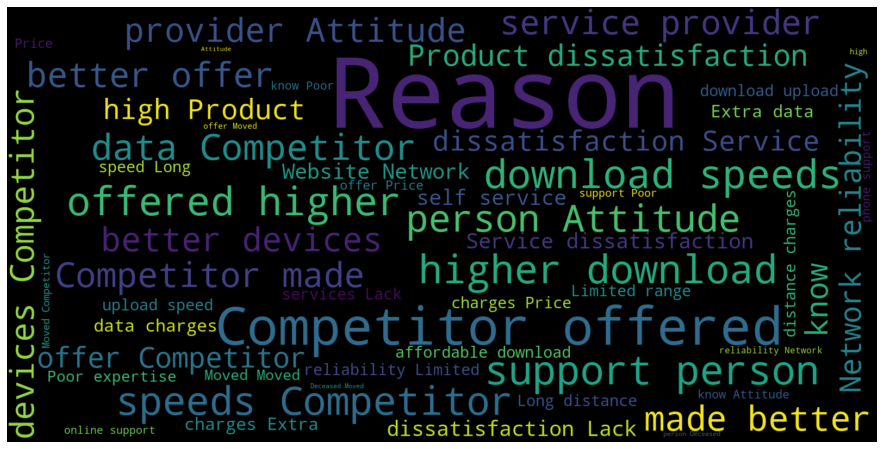

In [ ]:
# Visualization wordclouds of Churn Reason
churn_reason = list(df_telco_churn['ChurnReason'])
wordcloud = WordCloud(width=1600, height=800,max_font_size=180, max_words=150)\
.generate(" ".join(churn_reason))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
fig = plt.gcf()
plt.show()

**Dari analisis di atas, pelanggan churn cenderung karena alasan**
1. Ditawarkan pelayanan yang lebih tinggi oleh kompetitor
2. Ditawarkan pelayanan yang lebih cepat oleh kompetitor
3. Kurangnya pelayanan baik dari jasa atau produk yang diberikan
4. Kekecewaan dalam pelayanan dan produk yang diberikan
5. Adanya biaya data tambahan
6. Adanya kendala kurangnya/adanya limit pada jaringan
7. Kendala jarak yang jauh
8. Keahlian yang buruk
9. Pelayanan yang mendukung secara online oleh kompetitor
10. Pelayanan dengan attitude yang kurang baik

In [ ]:
# Define category variables
category_cols = ['Gender','Partner','Dependents','SeniorCitizen','PhoneService',
                'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                'IsContracted','Contract','PaperlessBilling','PaymentMethod']


# Define numerical variables
numeric_cols = ['TenureMonths','MonthlyCharges','TotalCharges','CLTV','ChurnScore']


# Define target
target_col = 'Churn'


# Spliting categorical columns into Nominal and Binary columns
nominal_cols = ['Gender','InternetService','PaymentMethod','Contract']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService',
               'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling',
               'InternetServiceType','IsContracted']

In [ ]:
# Function to generate boxplot for check outlier
def Generate_boxplot_outlier(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

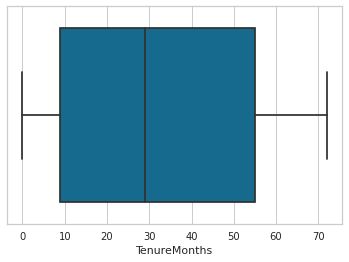

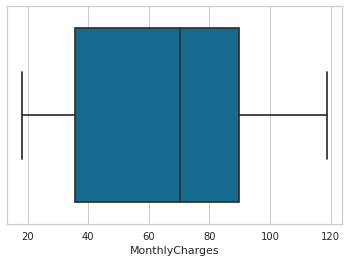

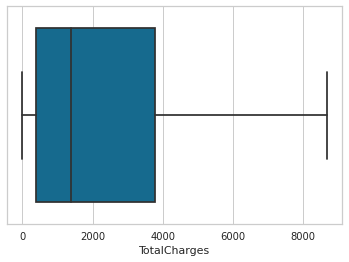

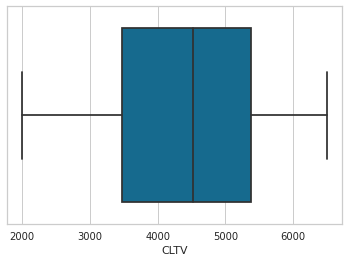

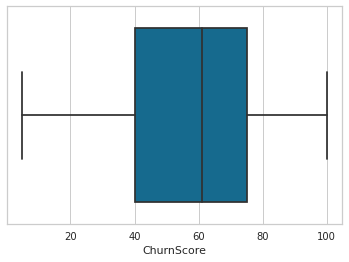

In [ ]:
# Apply generate boxplot outlier of each numeric columns
for i in numeric_cols:
    Generate_boxplot_outlier(df_telco_churn,i)

Grafik plot kotak menunjukkan bahwa tidak ada kolom numerik yang memiliki outlier.

In [ ]:
# Function to generate bargraph for calculate churn rate 
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    fig, ax = plt.subplots()
    ax.bar(range(len(x)), y, width = 0.75, color=color, alpha = 0.6) 
    # Stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i,v+0.05,str(round((v*100),2))+'%',fontsize=13,ha='center')
    
    plt.show()

# **=== > Calculate Churn Rate**

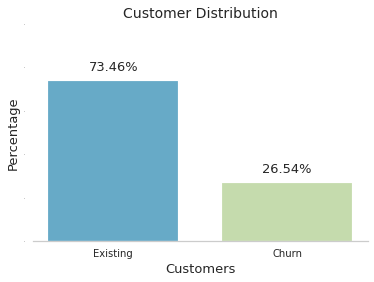


======= Churn Rate =========
0    0.73463
1    0.26537
Name: Churn, dtype: float64


In [ ]:
# Visualization bar graph of Churn 
Churn_rate = df_telco_churn['Churn'].value_counts() / df_telco_churn.shape[0]
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print("\n======= Churn Rate =========")
print(Churn_rate)

**Tingkat churn perusahaan telekomunikasi adalah sekitar 26%**, Artinya sekitar 26% pelanggan meninggalkan perusahaan selama interval tertentu.

# **=== > Distribution of features as per Churn**

# Distribution of categorical and binary variables

In [ ]:
def Create_label_data(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2, bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%', ha = 'center'
                    , fontsize = 13)
            
            
def Generate_dist_graph(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')
        
        plt_cat = sns.catplot(x=feature, y='Percentage', data = feature_summary
                              , col=distribution_col, kind='bar', aspect = 0.8
                              , palette = plotColor, alpha = 0.6)
        
        if feature == 'PaymentMethod':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
        
        for ax1, ax2 in plt_cat.axes:
            Create_label_data(ax1)
            Create_label_data(ax2)
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribution",fontsize=14)
    plt.show()

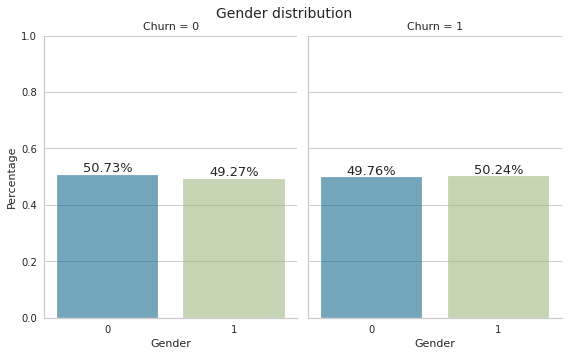

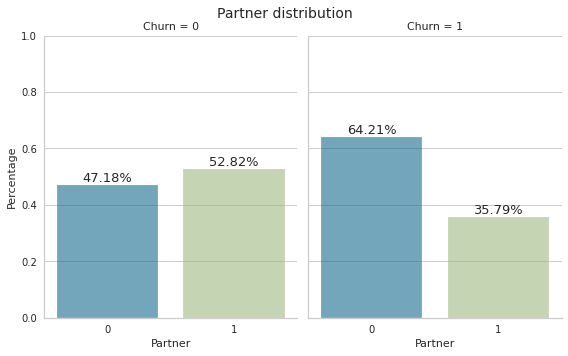

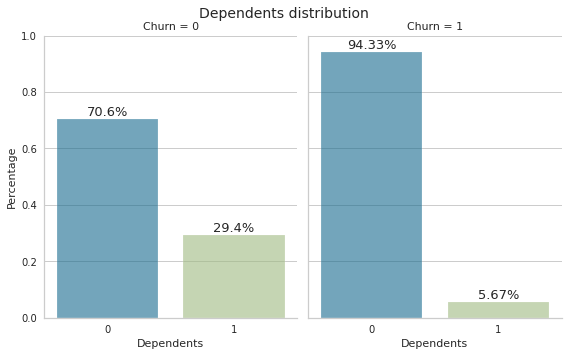

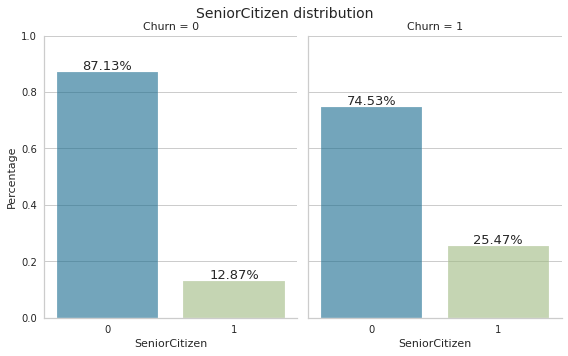

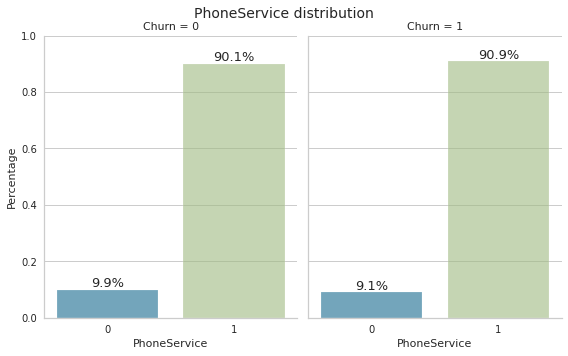

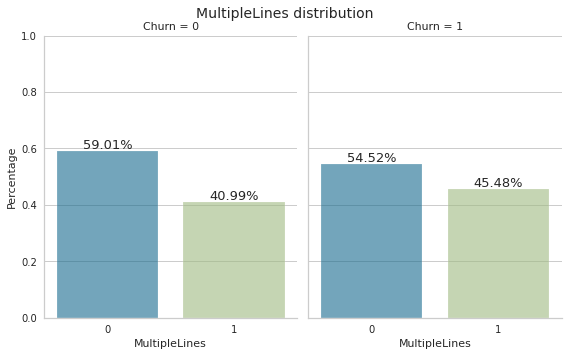

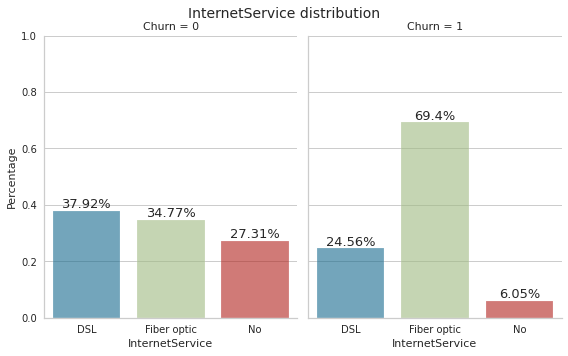

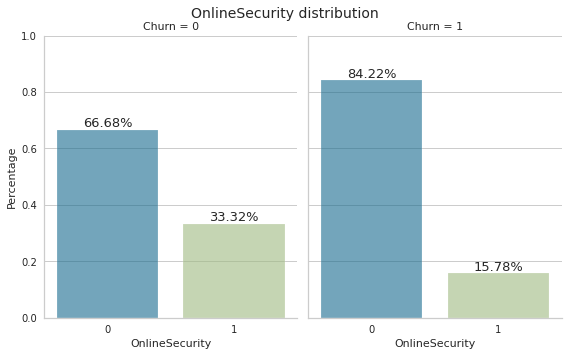

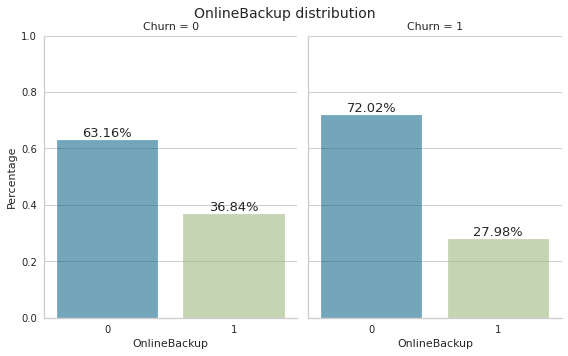

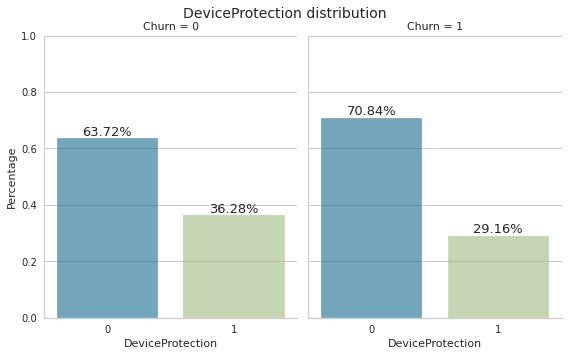

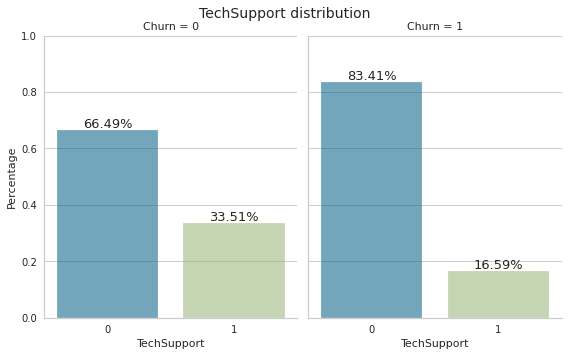

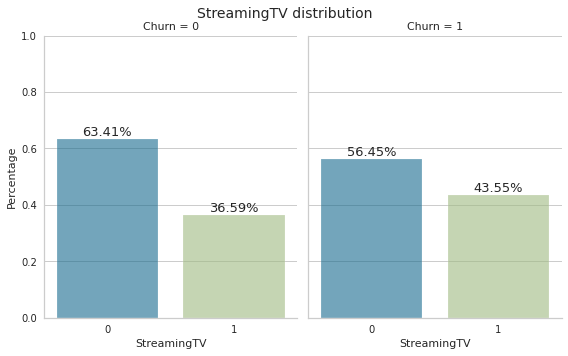

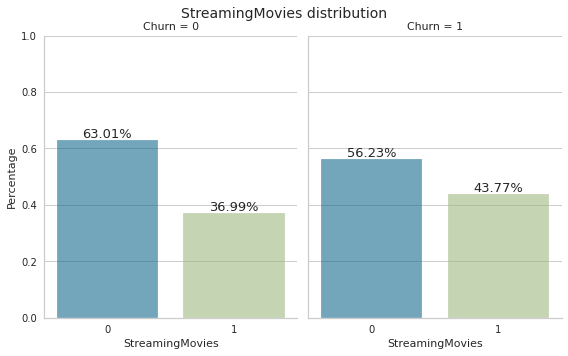

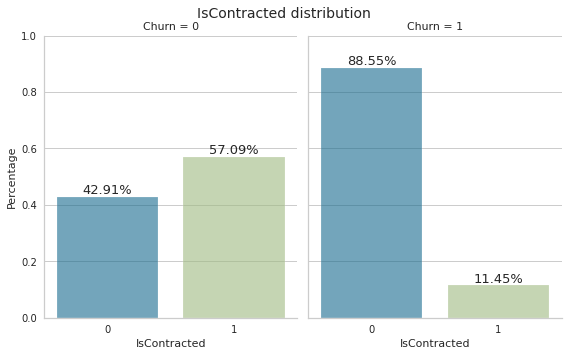

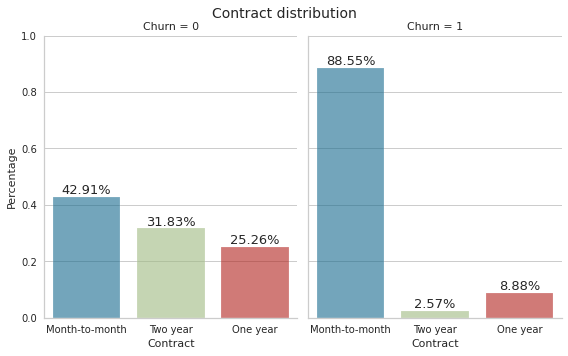

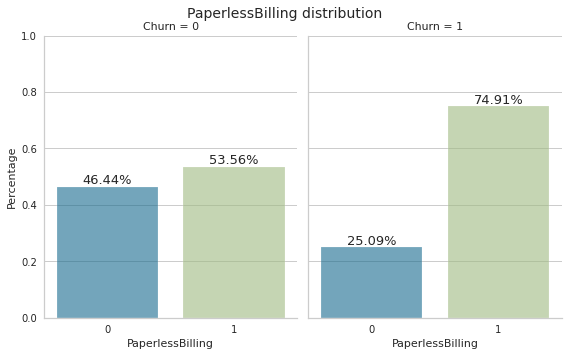

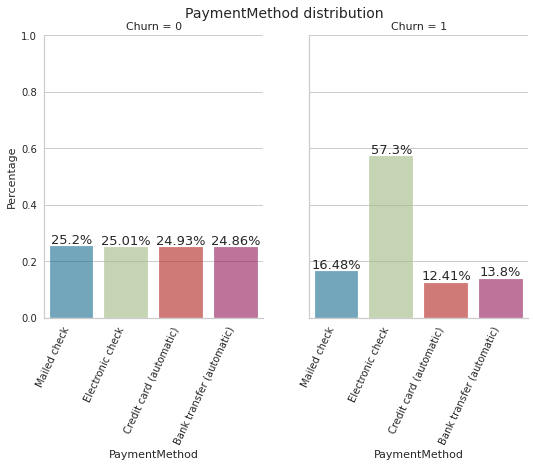

In [ ]:
# Apply generate distribution graph of each categorical columns
churn_summary = df_telco_churn.groupby('Churn')
Generate_dist_graph(churn_summary, category_cols, 'Churn')

**Dari analisis di atas, pelanggan churn cenderung**

- Tidak memiliki pasangan dan Tanggungan; berarti cenderung lajang. 
- Memiliki layanan internet dan khususnya serat optik 
- Tidak memiliki layanan keamanan online, layanan cadangan online, layanan perlindungan perangkat, layanan dukungan teknis 
- Memiliki layanan streaming TV dan film streaming 
- Memiliki kontrak berbasis bulanan 
- Memiliki layanan penagihan tanpa kertas 
- Memiliki pembayaran cek elektronik metode

# **=== > Tenure vs Churn Distribution**

In [ ]:
def Numerical_distribution(df_telco_churn,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,12))
    
    plt.subplot(2,1,1)
    ax = sns.kdeplot(df_telco_churn[feature], color = 'g', shade = True)
    
    title_str = "Original " +feature + " Distribution"
    plt.title(title_str)
    
    plt.subplot(2,1,2)
    ax = sns.kdeplot(df_telco_churn.loc[(df_telco_churn['Churn']==1),feature], color = 'g'
                     , shade = True, label='Chrun')

    ax = sns.kdeplot(df_telco_churn.loc[(df_telco_churn['Churn']==0) ,feature], color = 'b'
                     , shade = True, label='No chrun')
    
    title_str = feature + " Distribution: Churn vs No churn"
    plt.title(title_str)
    plt.show()

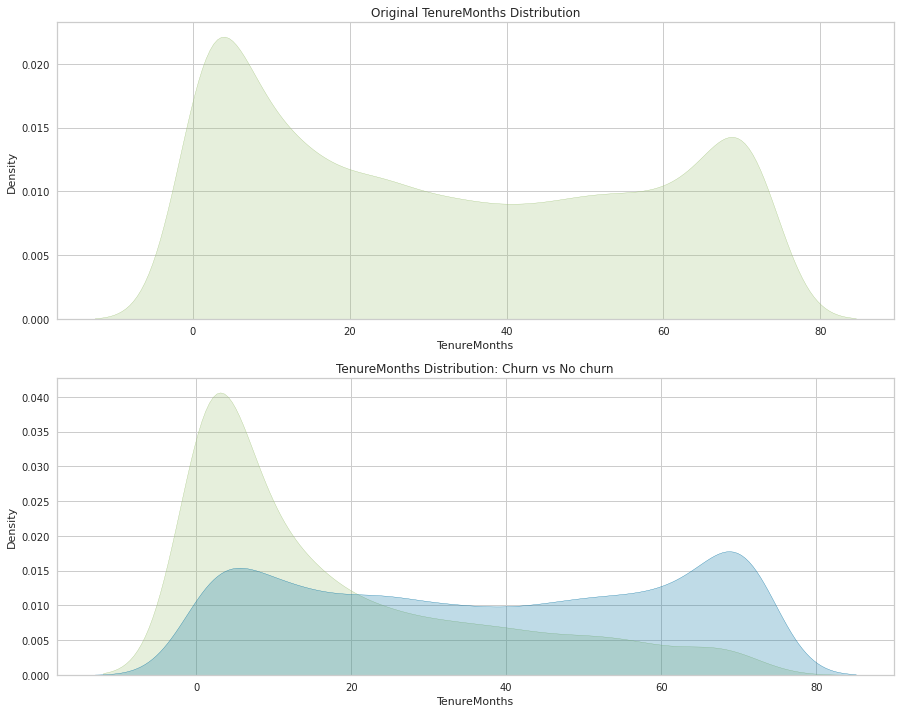

In [ ]:
Numerical_distribution(df_telco_churn,'TenureMonths')

# **=== > MonthlyCharges vs Churn Distribution**

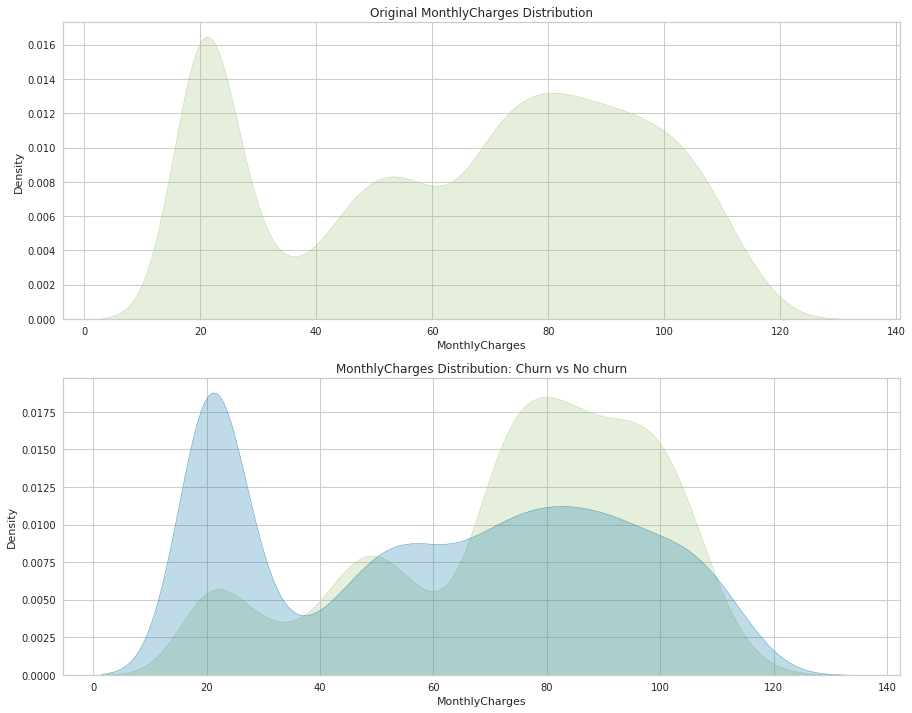

In [ ]:
Numerical_distribution(df_telco_churn,'MonthlyCharges')

# **=== > TotalCharges vs Churn Distribution**

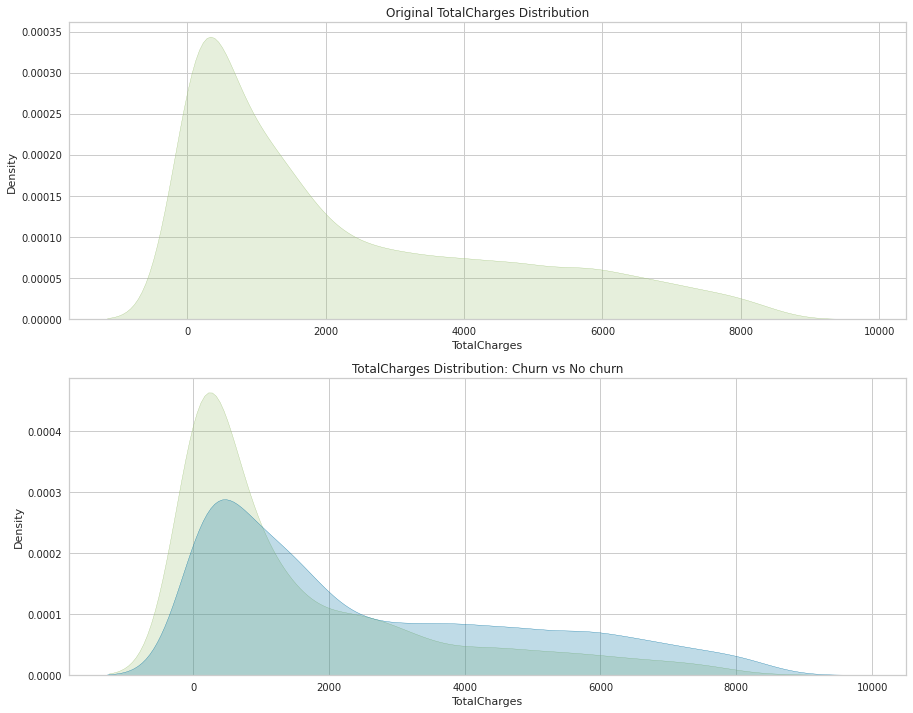

In [ ]:
Numerical_distribution(df_telco_churn, 'TotalCharges')

**Dari distribusi di atas, pelanggan churn adalah**

- Lebih mungkin untuk meninggalkan perusahaan yang masa kerjanya kurang dari satu tahun 
- Lebih mungkin untuk memiliki lebih dari 65 dolar biaya bulanan

# **=== > Cluster Analysis**

Mari kita periksa apakah ada hubungan antara Tenure dan MonthlyCharges.

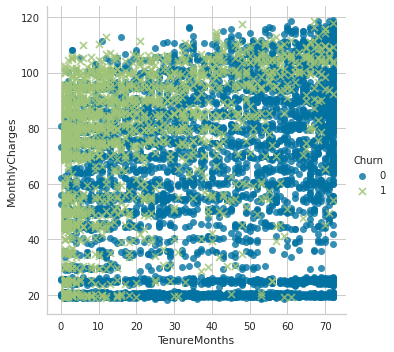

In [ ]:
sns.lmplot(x='TenureMonths',y='MonthlyCharges',data=df_telco_churn,
           hue='Churn',fit_reg=False,markers=["o", "x"],palette= plotColor)
plt.show()

**Dari hasil analisa, terdapat beberapa cluster berdasarkan Tenure dan Monthly Charges.**

Mari kita terapkan algoritma cluster K-means untuk melihat cluster. Sebelum meneruskan data ke algo K-means, perlu dilakukan normalisasi Tenure dan Biaya Bulanan.

In [ ]:
def Normalize_feature(feature):
    """ Return normalized features """
    return StandardScaler().fit_transform(feature)
    
# Normalized Tenure Months and MonthlyCharges
df_telco_churn['Tenure_norm'] = Normalize_feature(df_telco_churn[['TenureMonths']])
df_telco_churn['MonthlyCharges_norm'] = Normalize_feature(df_telco_churn[['MonthlyCharges']])
df_telco_churn.head()

CustomerID  City  ZipCode                 LatLong   Latitude   Longitude  \
0  3668-QPYBK     0    90003  33.964131, -118.272783  33.964131 -118.272783   
1  9237-HQITU     0    90005   34.059281, -118.30742  34.059281 -118.307420   
2  9305-CDSKC     0    90006  34.048013, -118.293953  34.048013 -118.293953   
3  7892-POOKP     0    90010  34.062125, -118.315709  34.062125 -118.315709   
4  0280-XJGEX     0    90015  34.039224, -118.266293  34.039224 -118.266293   

   Gender  SeniorCitizen  Partner  Dependents  ...  Churn  ChurnScore  CLTV  \
0       0              0        0           0  ...      1          86  3239   
1       1              0        0           1  ...      1          67  2701   
2       1              0        0           1  ...      1          86  5372   
3       1              0        1           1  ...      1          84  5003   
4       0              0        0           1  ...      1          89  5340   

                     ChurnReason  ChurnReasonType  InternetServiceType  \
0   Competitor made better offer                0                    1   
1                          Moved                1                    1   
2                          Moved                1                    1   
3                          Moved                1                    1   
4  Competitor had better devices                2                    1   

   PaymentMethodType  IsContracted  Tenure_norm  MonthlyCharges_norm  
0                  2             0    -1.236724            -0.362660  
1                  2             0    -1.236724             0.197365  
2                  2             0    -0.992402             1.159546  
3                  2             0    -0.177995             1.330711  
4                  0             0     0.677133             1.294151  

[5 rows x 35 columns]

In [ ]:
def Elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data
    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]
    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]
    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()

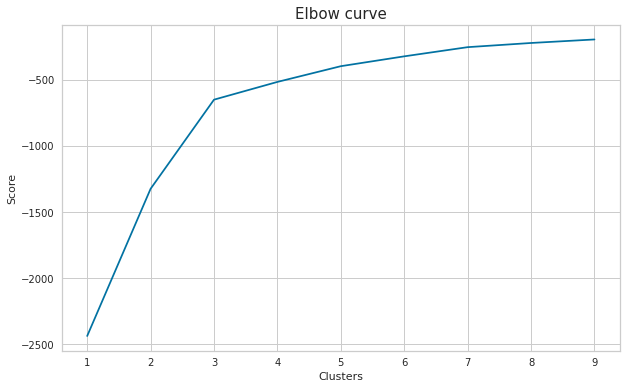

In [ ]:
# Checking number of clusters
Elbow_curve(df_telco_churn[df_telco_churn.Churn==1][['Tenure_norm','MonthlyCharges_norm']])

Dari **Kurva Elbow**, 3 merupakan hasil paling efisien.

In [ ]:
def Kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 
    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # Color of data points
                , alpha=0.25 # Transparancy of data points
               )
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # Marker size
               )
    plt.title(chart_title,fontsize=15)
    plt.show()
    return kmeans.fit_predict(df_telco_churn[df_telco_churn.Churn==1][[x_title+'_norm', y_title +'_norm']])

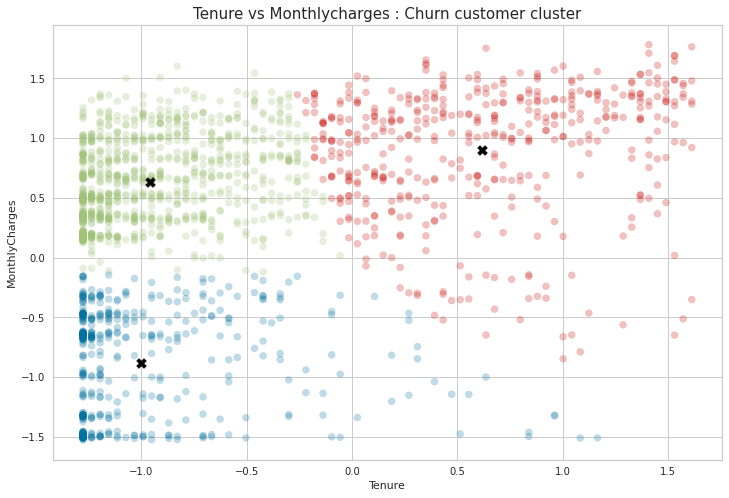

In [ ]:
df_telco_churn['Cluster'] = 1 # by default set Cluster to 1
df_telco_churn.loc[(df_telco_churn.Churn==1),'Cluster'] = Kmeans_cluster_graph(df_telco_churn
                    ,df_telco_churn[df_telco_churn.Churn==1][['Tenure_norm','MonthlyCharges_norm']]
                    ,3
                    ,'Tenure'
                    ,'MonthlyCharges'
                    ,"Tenure vs Monthlycharges : Churn customer cluster")

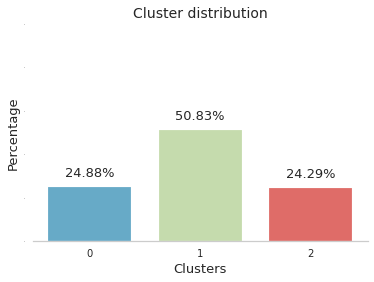

In [ ]:
# Distribution of clusters
churn_distribution =  df_telco_churn[df_telco_churn['Churn']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph(x= churn_distribution.index, y = churn_distribution.values, 
                   x_title = 'Clusters', y_title = 'Percentage', 
                   chart_title = 'Cluster distribution', color = plotColor)

**Berdasarkan grafik cluster K-means, kita dapat melihat bahwa ada tiga kelompok.**

1. Tenure Rendah dan Biaya Bulanan Tinggi (Green cluster)
2. Tenure Tinggi dan Biaya Bulanan Tinggi (cluster Merah)
3. Tenure Rendah dan Biaya Bulanan Rendah (Blue cluster)

Dan dari grafik distribusi menunjukkan bahwa sekitar 50% pelanggan termasuk dalam cluster **Low Tenure** dan **High Monthly Charges**.

Mari kita periksa Masa Kerja rata-rata dan Biaya Bulanan berdasarkan cluster.

In [ ]:
# Display the comparison of the MonthlyIncome variable from the Department variable
df_cluster_gp = df_telco_churn[df_telco_churn['Churn']==1]
pd.pivot_table(data=df_cluster_gp,index=['Cluster'],values=['TenureMonths','MonthlyCharges'],aggfunc='mean')\
.style.set_properties(**{'background-color': 'blue','color': 'white'})

Berdasarkan informasi terkait demografi/penggunaan/akun, kita telah mencoba untuk mengeksplorasi karakteristik pelanggan churn oleh setiap cluster.

Misalnya, dalam keseluruhan pelanggan churn, persentase perempuan adalah 50,2%. Dan pada klaster 2 (masa kerja rendah dan biaya bulanan tinggi), persentase perempuan adalah 53,15%. Berarti perempuan lebih cenderung meninggalkan perusahaan karena biaya bulanan yang tinggi dan masa kerja yang lebih rendah.

Dengan menggunakan teknik ini, kita juga telah menjelajahi variabel lain.

In [ ]:
def Extract_highest_in_cluster(df_telco_churn, df_cluster, feature, tenure_charges_cluster_df ):
    """ For each features, compare cluster's value with overall value 
    and find out highest distributed features for that cluster  """
    
    df = df_telco_churn.copy()
    feature_churn_dist = df[(df['Churn']==1)][feature].value_counts(normalize=True).reset_index()
    feature_churn_dist.columns = [feature,'Percentage']
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Percentage']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    tenure_MonthlyCharges_df = df_telco_churn[df_telco_churn['Churn']==1].groupby(['Cluster',feature],as_index=False)['TenureMonths','MonthlyCharges'].mean()
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
      for i, label in enumerate(feature_churn_dist[feature].unique()):
          cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Percentage']
          feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Percentage']
          
          if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
              if((feature_val.values[0] < cluster_val.values[0])):
                  
                  tenure_charges_cluster_df = tenure_charges_cluster_df.append(pd.DataFrame({'Category':feature
                          , 'Label_value_actually': ("Not have a "+ feature) if (df_telco_churn[feature].dtypes == 'int64') & (label == 0) else (("Have a "+feature) if (df_telco_churn[feature].dtypes == 'int64') & (label == 1) else label)
                          , 'Percentage': cluster_val.values[0]
                          , 'Cluster' : cluster
                          , 'Avg_Tenure': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['TenureMonths'].values[0],2)
                          , 'Avg_MonthlyCharges': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['MonthlyCharges'].values[0],2)
                          , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                          , 'Label_in_graph' :  feature if (df_telco_churn[feature].dtypes == 'int64') else label
                          }
                      , index = [len(tenure_charges_cluster_df)])
                      )  
    return tenure_charges_cluster_df

In [ ]:
tenure_charges_cluster_df = pd.DataFrame()

features = ['Gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetServiceType','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'Contract','PaperlessBilling','PaymentMethod','InternetService']

df_cluster_gp = df_telco_churn[df_telco_churn['Churn']==1].groupby('Cluster')

for feature in features:
    tenure_charges_cluster_df = Extract_highest_in_cluster(df_telco_churn, df_cluster_gp, feature,tenure_charges_cluster_df)

# **Cluster 1 - Low Tenure and Low Monthly Charges**

In [ ]:
tenure_charges_cluster_0 = tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==0]
pd.pivot_table(data=tenure_charges_cluster_0,index=['Category', 'Label_value_actually', 'Label_in_graph', 'Represent_in_graph'],
               values=['Percentage','Avg_Tenure','Avg_MonthlyCharges'],aggfunc='mean')\
               .style.set_properties(**{'background-color': '#33F9FF','color': 'black'})

# **Cluster 2 - Low Tenure and High Monthly Charges**

In [ ]:
tenure_charges_cluster_1 = tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==1]
pd.pivot_table(data=tenure_charges_cluster_1,index=['Category', 'Label_value_actually', 'Label_in_graph', 'Represent_in_graph'],
               values=['Percentage','Avg_Tenure','Avg_MonthlyCharges'],aggfunc='mean')\
               .style.set_properties(**{'background-color': '#338AFF','color': 'white'})

# **Cluster 3 - High Tenure and High Monthly Charges**

In [ ]:
tenure_charges_cluster_2 = tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==2]
pd.pivot_table(data=tenure_charges_cluster_2,index=['Category', 'Label_value_actually', 'Label_in_graph', 'Represent_in_graph'],
               values=['Percentage','Avg_Tenure','Avg_MonthlyCharges'],aggfunc='mean')\
               .style.set_properties(**{'background-color': '#BB33FF','color': 'black'})

In [ ]:
# Drop unnecessary column 
df_telco_churn = df_telco_churn.drop(['Tenure_norm','MonthlyCharges_norm'], axis=1)
df_telco_churn

CustomerID  City  ZipCode                 LatLong   Latitude  \
0     3668-QPYBK     0    90003  33.964131, -118.272783  33.964131   
1     9237-HQITU     0    90005   34.059281, -118.30742  34.059281   
2     9305-CDSKC     0    90006  34.048013, -118.293953  34.048013   
3     7892-POOKP     0    90010  34.062125, -118.315709  34.062125   
4     0280-XJGEX     0    90015  34.039224, -118.266293  34.039224   
...          ...   ...      ...                     ...        ...   
7038  2569-WGERO   731    92285  34.341737, -116.539416  34.341737   
7039  6840-RESVB    71    92301  34.667815, -117.536183  34.667815   
7040  2234-XADUH   395    92304  34.559882, -115.637164  34.559882   
7041  4801-JZAZL   396    92305     34.1678, -116.86433  34.167800   
7042  3186-AJIEK    72    92308  34.424926, -117.184503  34.424926   

       Longitude  Gender  SeniorCitizen  Partner  Dependents  ...  \
0    -118.272783       0              0        0           0  ...   
1    -118.307420       1              0        0           1  ...   
2    -118.293953       1              0        0           1  ...   
3    -118.315709       1              0        1           1  ...   
4    -118.266293       0              0        0           1  ...   
...          ...     ...            ...      ...         ...  ...   
7038 -116.539416       1              0        0           0  ...   
7039 -117.536183       0              0        1           1  ...   
7040 -115.637164       1              0        1           1  ...   
7041 -116.864330       1              0        1           1  ...   
7042 -117.184503       0              0        0           0  ...   

      TotalCharges  Churn  ChurnScore  CLTV                    ChurnReason  \
0           108.15      1          86  3239   Competitor made better offer   
1           151.65      1          67  2701                          Moved   
2           820.50      1          86  5372                          Moved   
3          3046.05      1          84  5003                          Moved   
4          5036.30      1          89  5340  Competitor had better devices   
...            ...    ...         ...   ...                            ...   
7038       1419.40      0          45  5306                      No Reason   
7039       1990.50      0          59  2140                      No Reason   
7040       7362.90      0          71  5560                      No Reason   
7041        346.45      0          59  2793                      No Reason   
7042       6844.50      0          38  5097                      No Reason   

      ChurnReasonType  InternetServiceType  PaymentMethodType  IsContracted  \
0                   0                    1                  2             0   
1                   1                    1                  2             0   
2                   1                    1                  2             0   
3                   1                    1                  2             0   
4                   2                    1                  0             0   
...               ...                  ...                ...           ...   
7038               20                    0                  0             1   
7039               20                    1                  2             1   
7040               20                    1                  1             1   
7041               20                    1                  2             0   
7042               20                    1                  0             1   

      Cluster  
0           0  
1           1  
2           1  
3           2  
4           2  
...       ...  
7038        1  
7039        1  
7040        1  
7041        1  
7042        1  

[7043 rows x 34 columns]

# **=== > Correlation Analysis**

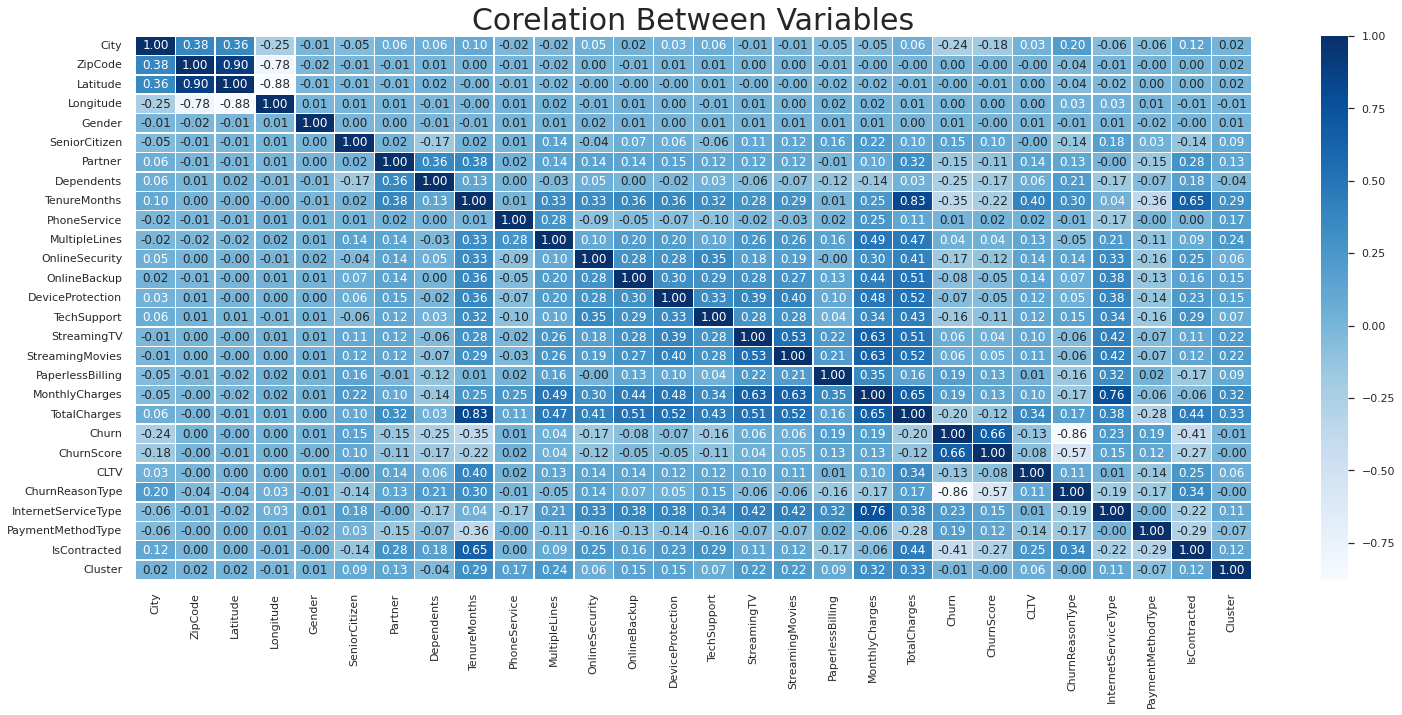

In [ ]:
# Visualization of correlation relationships
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (25, 10) 
sns.heatmap(df_telco_churn.corr(), annot = True, linewidths=.5, fmt = '.2f', cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

Dari matriks korelasi, fitur seperti **Tenure**, **MonthlyCharges**, dan **TotalCharges** sangat berkorelasi dengan layanan seperti **MultipleLines**, **PhoneServies** dan layaran internet seperti **InternetService**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV** dan layanan **StreamingMovies**.

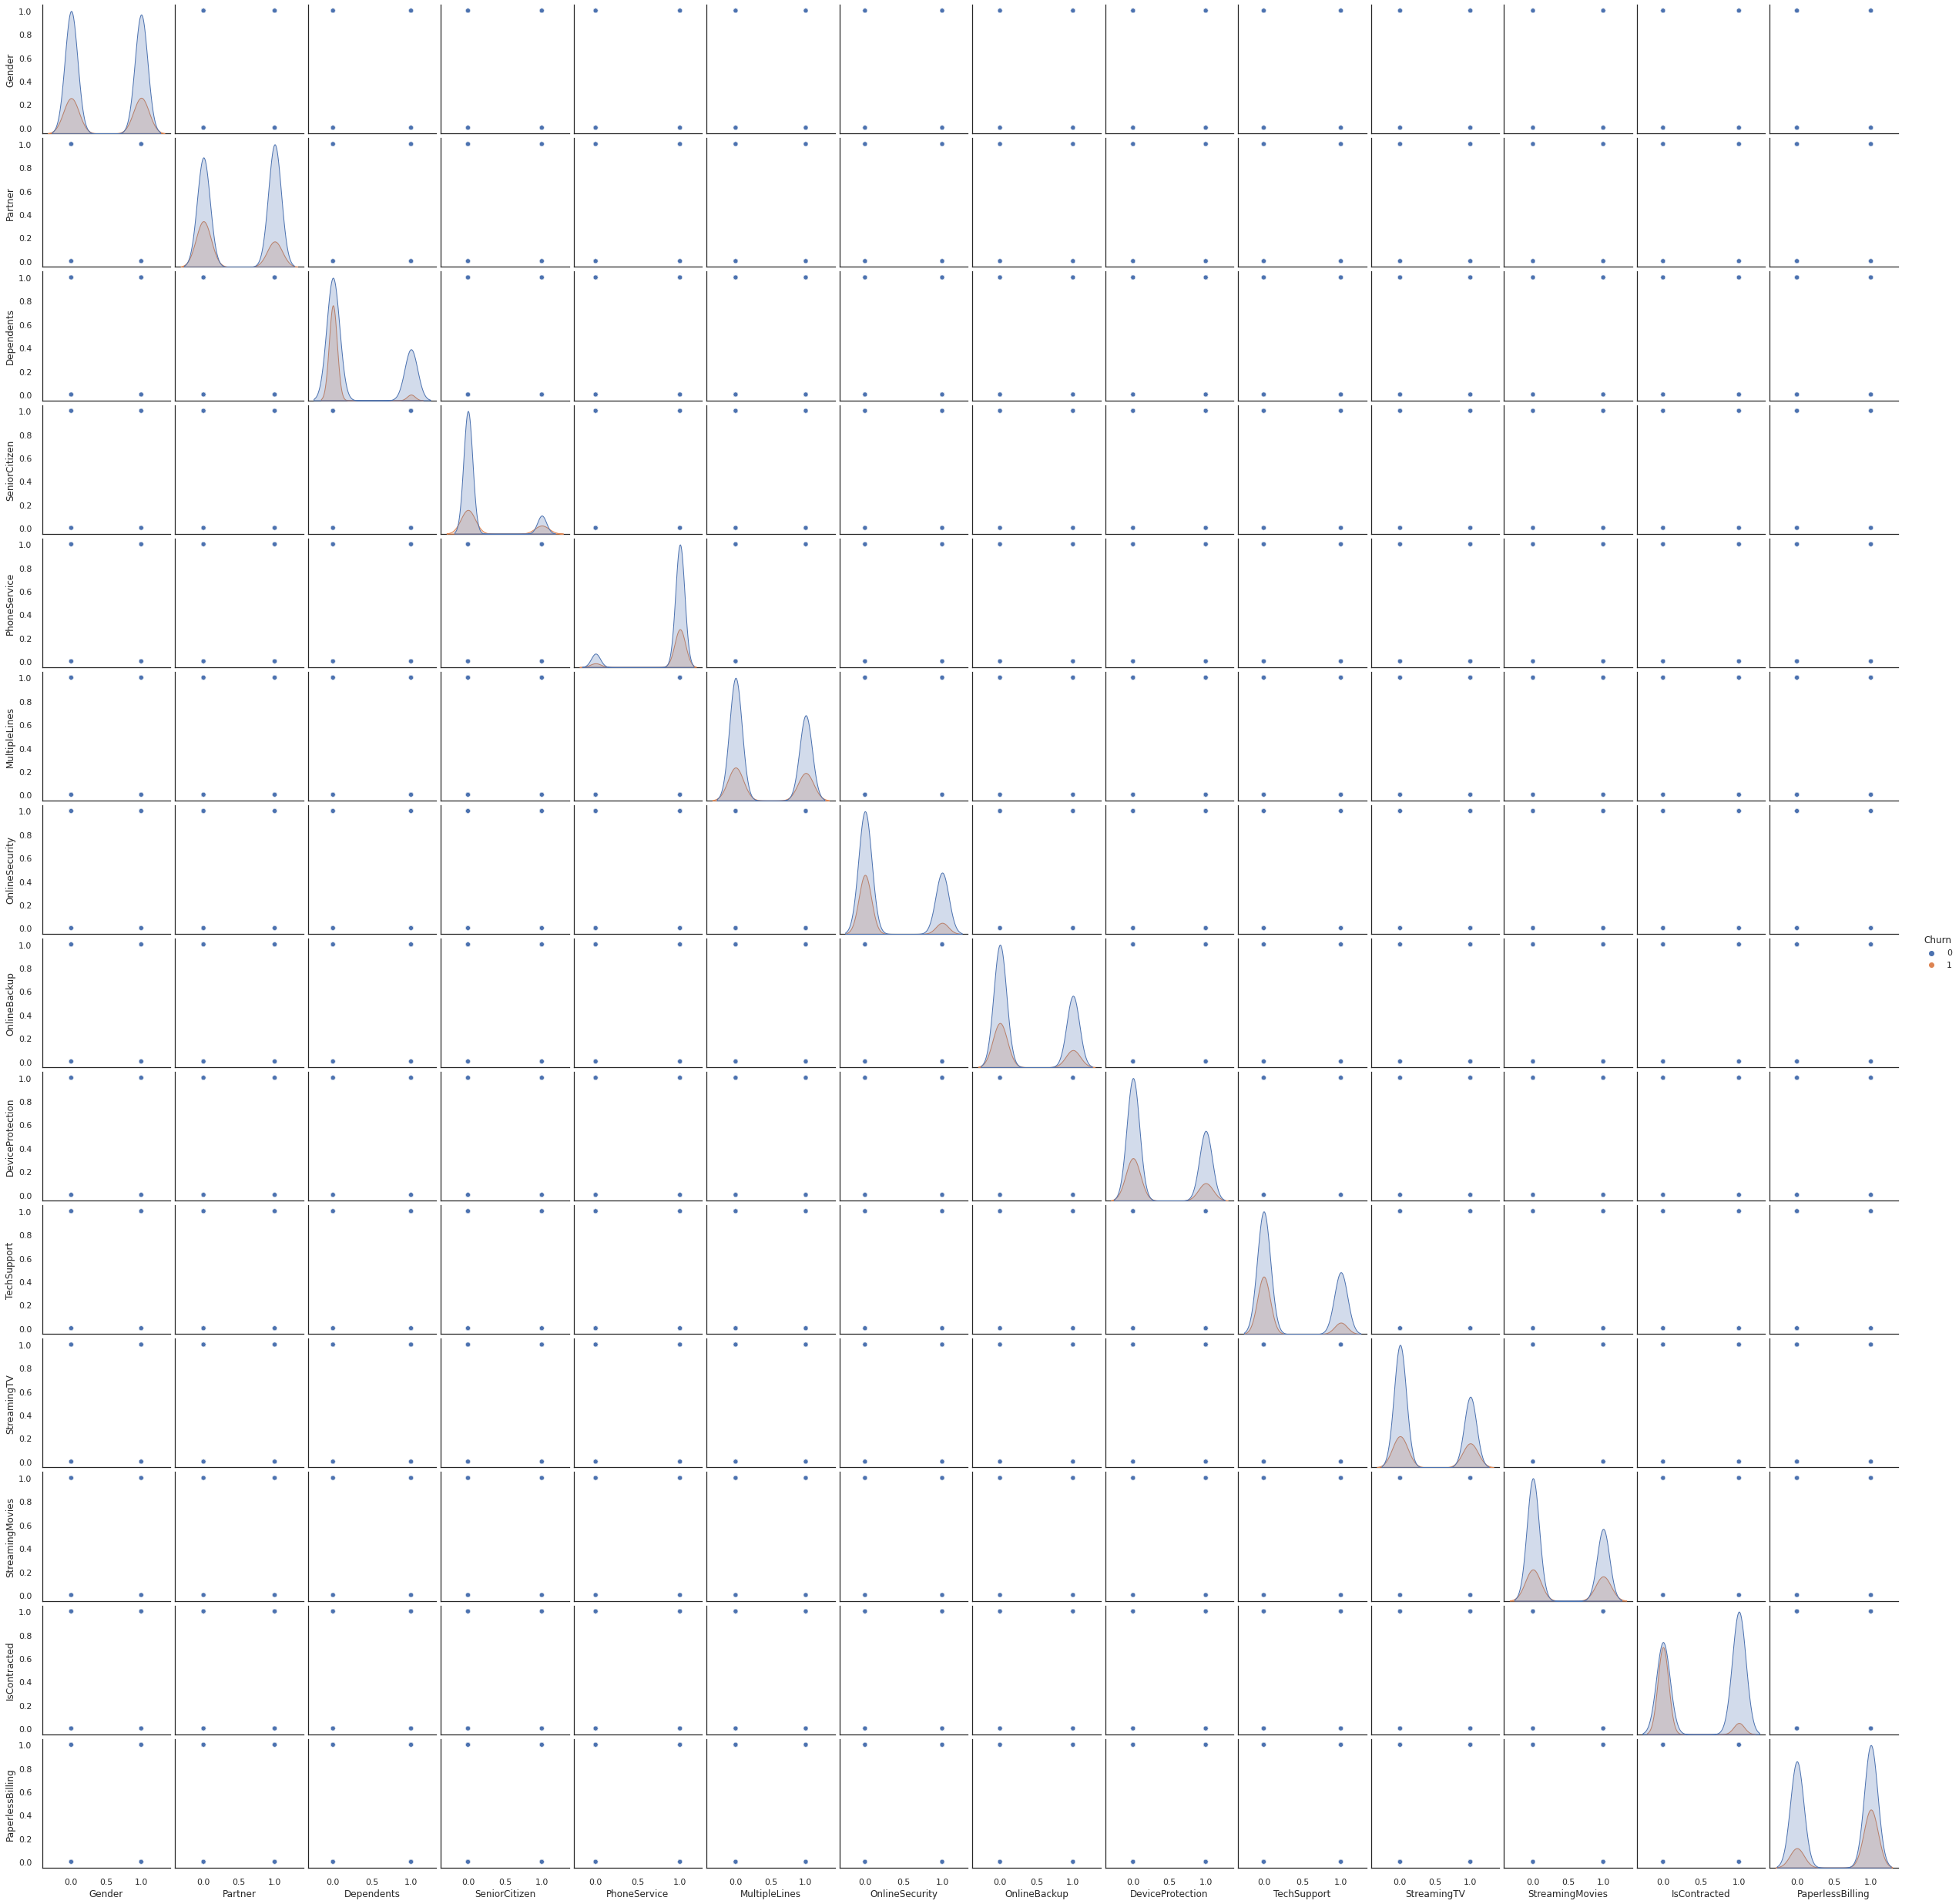

In [ ]:
# Display categorical variable & plot
sns.pairplot(df_telco_churn[category_cols + ['Churn']], hue='Churn')

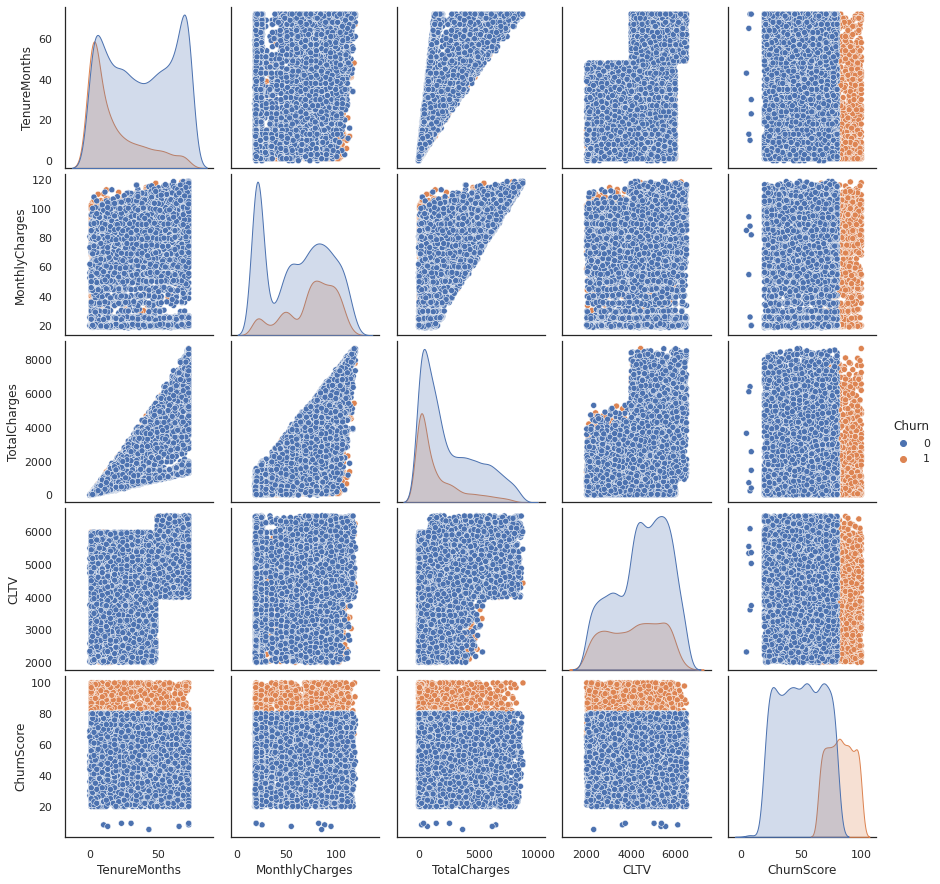

In [ ]:
# Display numerical variable & plot
sns.pairplot(df_telco_churn[numeric_cols + ['Churn']], hue='Churn')

# **STEP # 5 MODELING AND EVALUATION**

Langkah-langkah Modeling terdiri dari:
1.   Shuffle Data
2.   One Hot Encoding untuk kolom yang bertipe nominal
3.   Merge fitur-fitur yang memiliki tipe data berbeda menjadi 1 data kesatuan
4.   Normalisasi fitur pada variabel X
5.   Menentukan variabel X (independent) dan Y (dependent)
5.   Train Test Split
6.   Modeling : 
     <br>
     a) Menggunakan Baseline Model 
     <br>
     b) Penambahan Teknik SMOTE untuk mengatasi dataset yang tidak seimbang
     <br>
7.   Evaluasi menggunakan AUC, G-Mean, F-Score, Confusion Matrix, dan Classification Report


In [ ]:
# Define category variables
category_cols = ['Gender','Partner','Dependents','SeniorCitizen','PhoneService',
                'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                'IsContracted','Contract','PaperlessBilling','PaymentMethod', 
                 'Cluster']

# Define numerical variables
numeric_cols = ['TenureMonths','MonthlyCharges','TotalCharges','CLTV','ChurnScore']

# Define target
target_col = 'Churn'


# Spliting categorical columns into Nominal and Binary columns
nominal_cols = ['InternetService','PaymentMethod','Contract']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService',
               'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling',
               'InternetServiceType','IsContracted']

In [ ]:
def data_shuffle(df):
    """ Return shuffled data based on rows """
    return shuffle(df).reset_index().drop('index'
                                          , axis = 1)

def onehot_encoding(df,feature):
    """ Apply one hot encoding to given features """
    return pd.concat([df
                      , pd.get_dummies(df[feature])]
                     , axis = 1)

def merged_df(data, features):
    """ Return merge dataframe with given features"""
    merged_df = pd.DataFrame()
    for feature in features:
        merged_df = pd.concat([merged_df, data[feature]]
                              , axis = 1)
    return merged_df

def df_normilze(data, cols):
    """ Normalize features """
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
        
    return data    

def create_model_df(df, col_cols, nom_cols, binary_cols, num_cols, target_col):
    """ Preparing data for modelling """
    
    df_model = merged_df(df , [col_cols, num_cols, target_col])
    df_model = data_shuffle(df_model)
    df_model = onehot_encoding(df_model, nom_cols)
    
    df_model.drop(nom_cols, axis = 1, inplace = True)
    
    df_model = df_normilze(df_model, num_cols)
    
    return (df_model.loc[:, ~df_model.columns.isin(target_col)]
            , df_model[target_col].values.flatten())


def train_test_split_df(feature, target, test_size):
    """ Spliting data to train and test"""
    return train_test_split(feature
                            ,target
                            ,test_size= test_size
                            ,random_state= random_state)

In [ ]:
df_model_feature,df_model_target = create_model_df(df_telco_churn,
                                                   category_cols,
                                                   nominal_cols,
                                                   binary_cols,
                                                   numeric_cols, 
                                                   [target_col])

x_train, x_test, y_train, y_test = train_test_split_df(df_model_feature, 
                                                       df_model_target, 
                                                       test_size = 0.2)

print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", x_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", x_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (7043, 30)
Original target shape,  (7043,)
x train shape,  (5634, 30)
y train shape,  (5634,)
x test shape,  (1409, 30)
y test shape,  (1409,)
----------------------------


In [ ]:
def Telco_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf):
    # Train model
    algorithm.fit(training_x, training_y)
    # Calculate prediction
    predictions = algorithm.predict(testing_x)
    # Calculate probabilities of prediction
    probabilities = algorithm.predict_proba(testing_x)

    # Confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)

    x = ["Not Churn (pred)","Churn (pred)"]
    y = ["Not Churn (true)","Churn (true)"]

    # Change each element of z to type string for annotations
    z_text = conf_matrix

    # Set up figure 
    fig_conf_matrix = ff.create_annotated_heatmap(z=conf_matrix, x=x, y=y, annotation_text=z_text, colorscale='Blues')

    # Get classification report
    target_names = ['Non Fraud', 'Fraud']
    report = classification_report(testing_y, predictions, target_names=target_names, 
                                   digits=4)

    # Show metrics
    Accuracy  =  accuracy_score(testing_y, predictions)
    Precision =  precision_score(testing_y, predictions, average='macro')
    Recall    =  recall_score(testing_y, predictions, average='macro')
    F1_score  =  f1_score(testing_y, predictions, average='macro')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    print('Model:', type(algorithm).__name__)
    print('\n')
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    model_AUPRC = average_precision_score(y_test, probabilities[:,1])
    print("AUPRC Score:", model_AUPRC)
    model_AUROC = roc_auc_score(testing_y, probabilities[:,1])
    print("AUROC Score:", model_AUROC)
    model_gmean = geometric_mean_score(testing_y, predictions)
    print("G-Mean Score:", model_gmean)
    print("F1 Score:", F1_score)
    print('\n')
    print('Classification Report : \n', report)

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
 
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_AUROC),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(testing_y, probabilities[:,1])
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    # Subplots
    fig = make_subplots(subplot_titles=('Confusion Matrix',
                                        'Classification Report',
                                        'ROC curve'+" "+ '('+ str(model_AUROC)+')',
                                        'Precision - Recall curve',
                                        ),
                        rows=2, cols=2)
    fig.append_trace(fig_conf_matrix.data[0],1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)

    annot1 = list(fig_conf_matrix.layout.annotations)

    new_annotations = annot1

    for anno in new_annotations:
        anno.update(font_color ='black')
        fig.add_annotation(anno)
    
    # Add colorbar
    fig_conf_matrix['data'][0]['showscale'] = True
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(algorithm),
                         autosize = False, height = 600,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1.05])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate")) 
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14 
    fig.show('png')

    if cf in ['coefficients', 'features']:
        global trace6
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)

        trace6 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients", 
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                    ))
        data = [trace6]
        fig2 = go.Figure(data = data)
        fig2['layout'].update(showlegend = False, title = '<b>Feature Importance</b><br>',
                              autosize = False, height = 600,width = 800,
                              plot_bgcolor = 'rgba(240,240,240, 0.95)',
                              paper_bgcolor = 'rgba(240,240,240, 0.95)')
        fig2.show('png')
    
    elif cf == 'None':
        print('')

In [ ]:
# Import SKLearn Libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Implementasi Model SKLearn terdiri dari :
1.  Logistic Regression --> Klasifikasi Model
2.  Decision Tree  --> Klasifikasi Model
3.  Gaussian Naive Bayes --> Klasifikasi Model
4.  Random Forest --> Ensemble Model
5.  K-Neighborhood --> Klasifikasi Model
6.  SVM --> Klasifikasi Model
7.  AdaBoost --> Ensemble Model
8.  GradientBoosting --> Ensemble Model


# **BASELINE MODEL**

Model: LogisticRegression


Accuracy Score: 0.9162526614620298
AUPRC Score: 0.9370186427448848
AUROC Score: 0.9747388976312523
G-Mean Score: 0.8925375046529631
F1 Score: 0.8924366246752305


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9449    0.9412    0.9431      1038
       Fraud     0.8373    0.8464    0.8418       371

    accuracy                         0.9163      1409
   macro avg     0.8911    0.8938    0.8924      1409
weighted avg     0.9166    0.9163    0.9164      1409



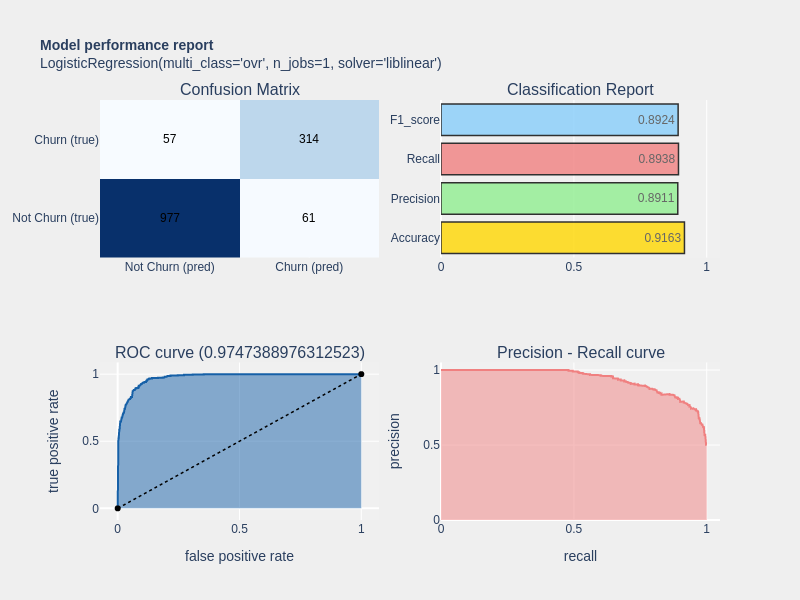

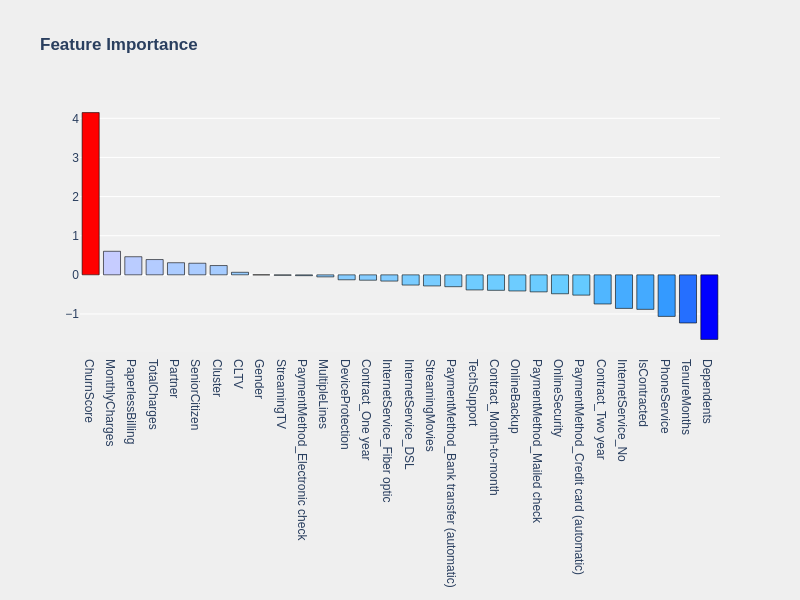

In [ ]:
# Baseline Logistic Regeression
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

Telco_churn_prediction(logit, x_train, x_test, y_train, y_test, "coefficients")

In [ ]:
def Treeplot(classifier, cols, classnames):
    # Plot decision tree
    graph = Source(tree.export_graphviz(classifier, out_file=None, 
                                        rounded=True, proportion=False,
                                        feature_names = cols, 
                                        precision = 2,
                                        class_names = classnames,
                                        filled = True))
    display(graph)

# Plot decision tree
cols = [i for i in df_model_feature.columns if i not in target_col]
target_col = ['Churn']

Model: DecisionTreeClassifier


Accuracy Score: 0.9737402413058907
AUPRC Score: 0.9793256612550928
AUROC Score: 0.9904686599255254
G-Mean Score: 0.9769571955617159
F1 Score: 0.9668600619025794


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9941    0.9701    0.9820      1038
       Fraud     0.9217    0.9838    0.9518       371

    accuracy                         0.9737      1409
   macro avg     0.9579    0.9770    0.9669      1409
weighted avg     0.9750    0.9737    0.9740      1409



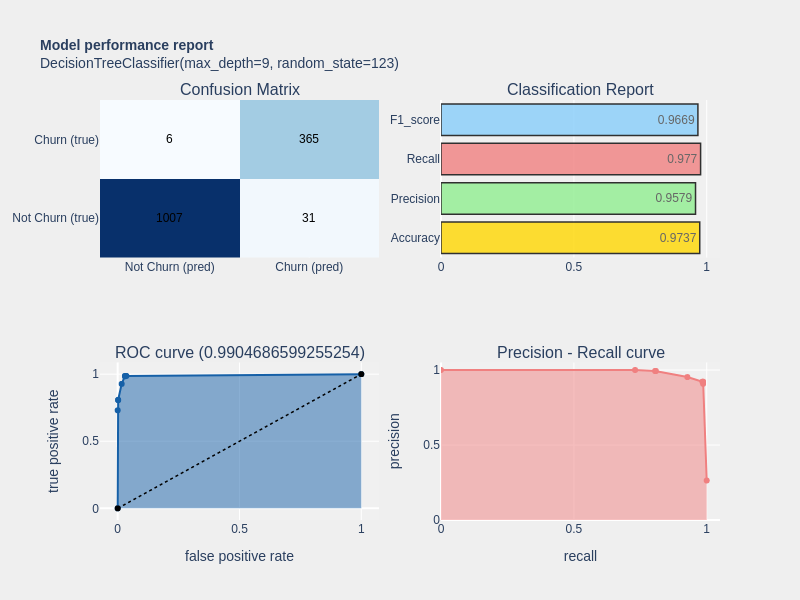

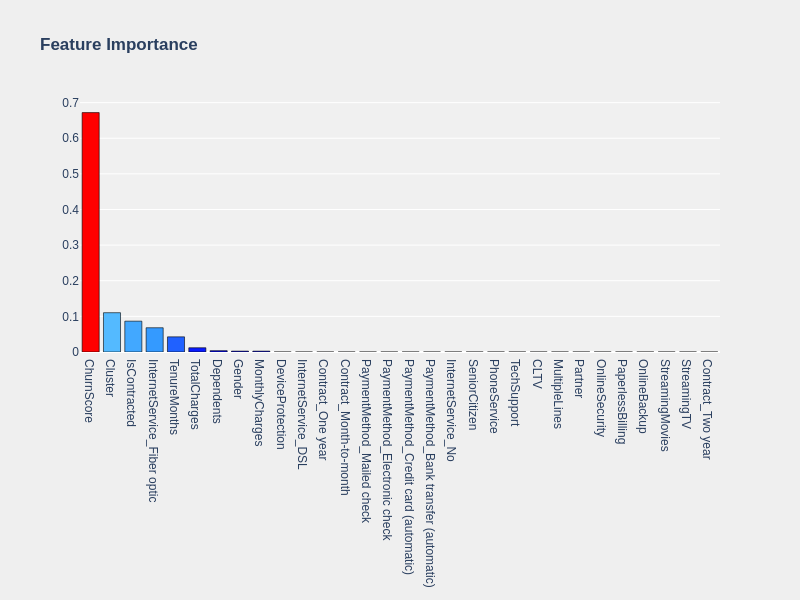

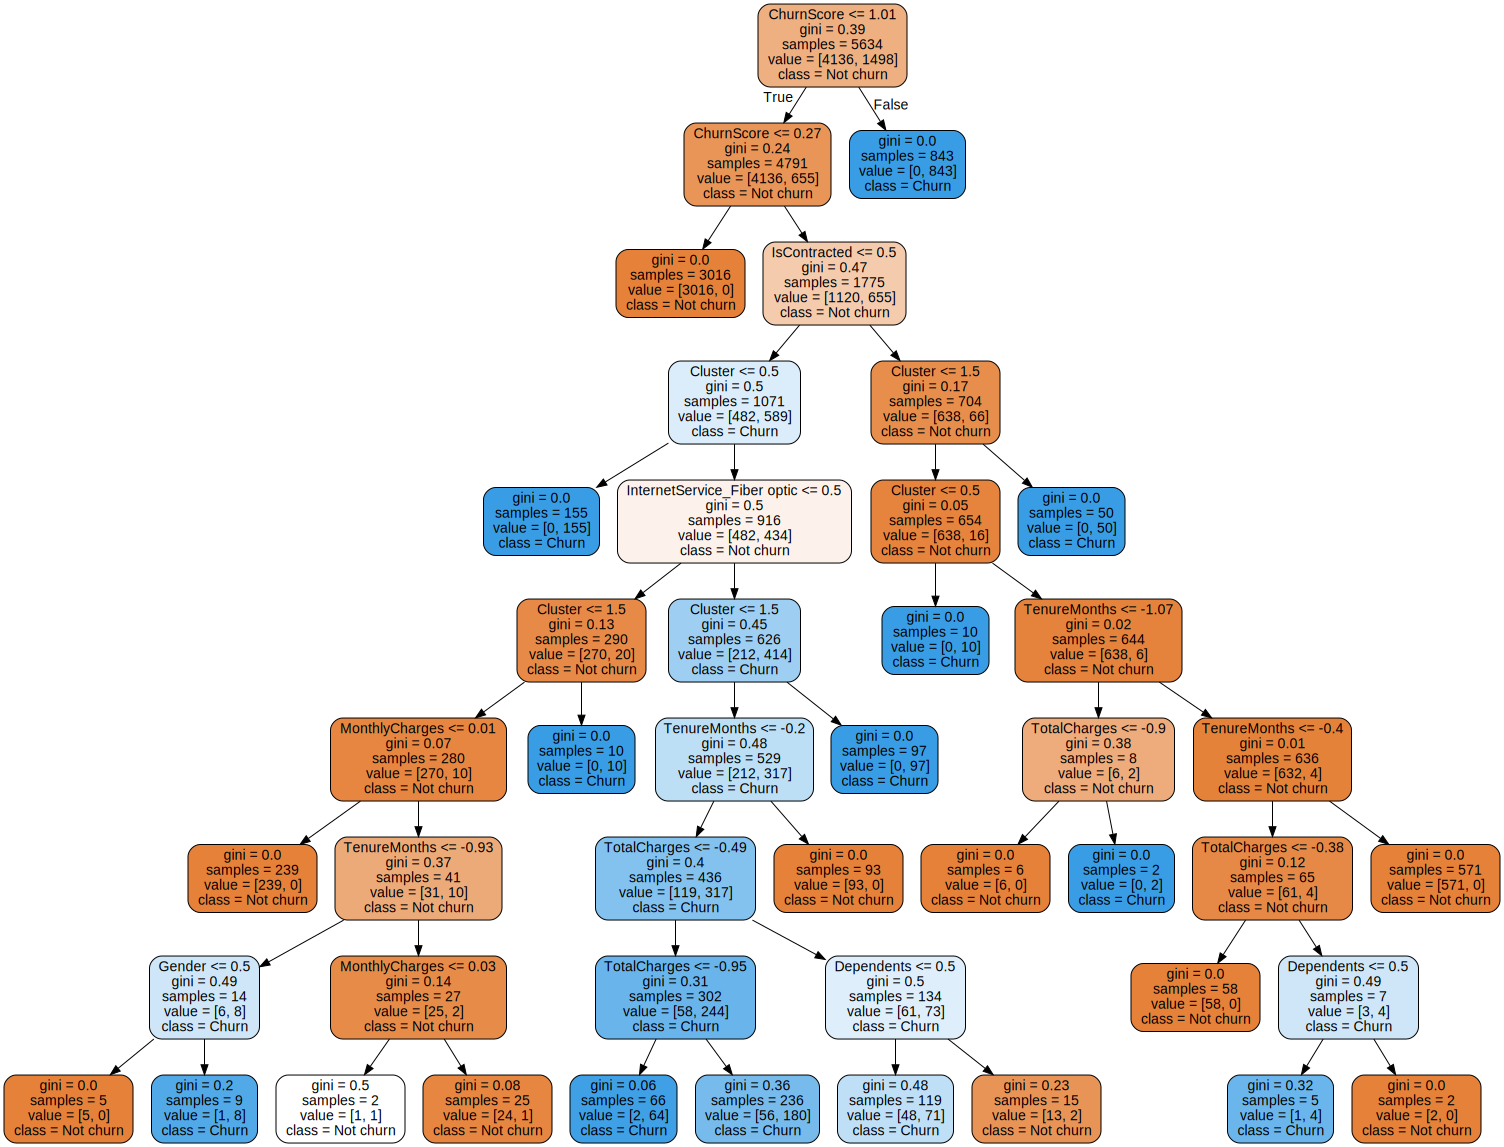

In [ ]:
# Baseline Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

Telco_churn_prediction(decision_tree, x_train, x_test, y_train, y_test, "features")
print("\n\n")

Treeplot(decision_tree, cols, ["Not churn", "Churn"])

Model: KNeighborsClassifier


Accuracy Score: 0.9325762952448545
AUPRC Score: 0.908602769178211
AUROC Score: 0.9729692182249714
G-Mean Score: 0.9164098483558798
F1 Score: 0.9137708341788437


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9582    0.9499    0.9540      1038
       Fraud     0.8632    0.8841    0.8735       371

    accuracy                         0.9326      1409
   macro avg     0.9107    0.9170    0.9138      1409
weighted avg     0.9332    0.9326    0.9328      1409



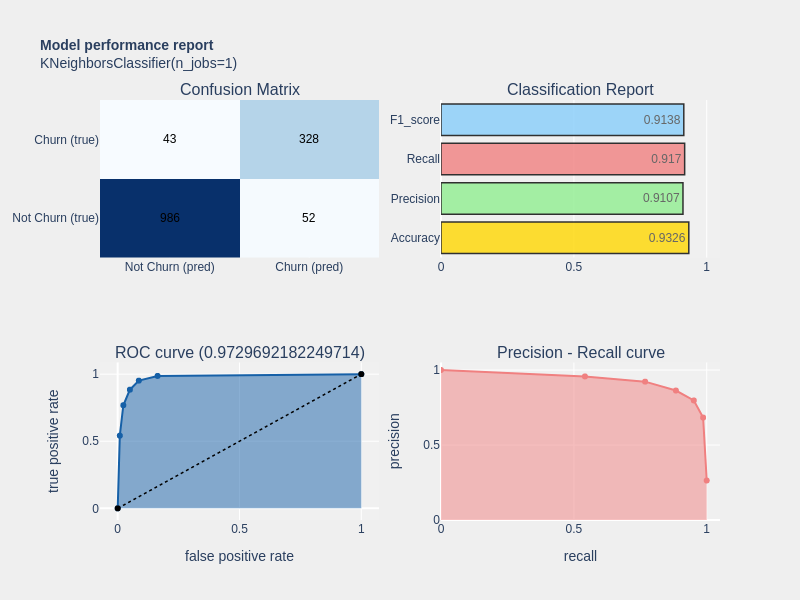

In [ ]:
# Baseline K Nearest Neighbor
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')

Telco_churn_prediction(knn, x_train, x_test, y_train, y_test, "None")

Model: RandomForestClassifier


Accuracy Score: 0.9730305180979418
AUPRC Score: 0.9875520095914596
AUROC Score: 0.9955180239835055
G-Mean Score: 0.9712965563348628
F1 Score: 0.9656533698725744


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9883    0.9750    0.9816      1038
       Fraud     0.9325    0.9677    0.9497       371

    accuracy                         0.9730      1409
   macro avg     0.9604    0.9713    0.9657      1409
weighted avg     0.9736    0.9730    0.9732      1409



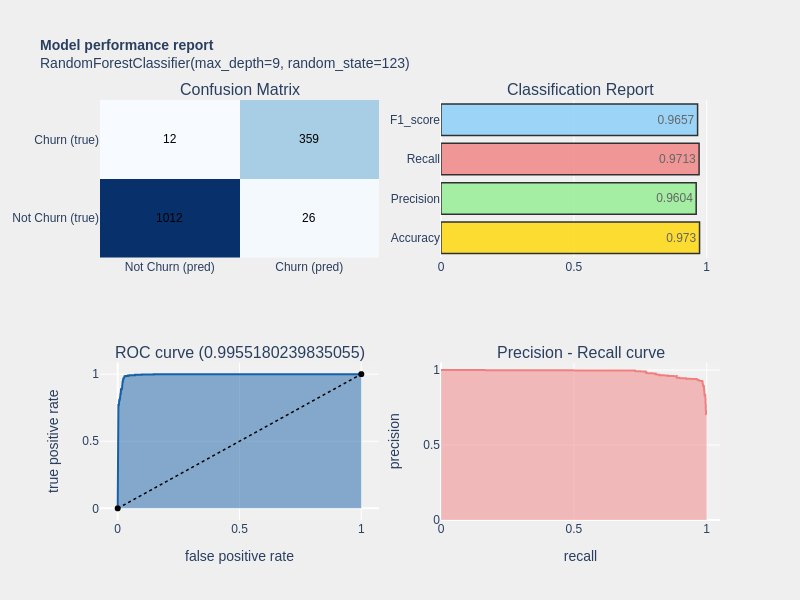

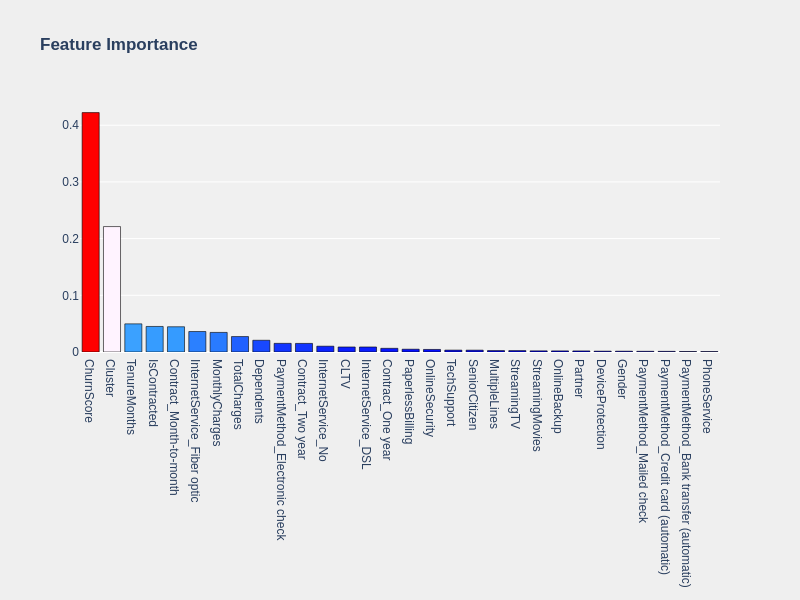

In [ ]:
# Baseline Random Forest
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")

Telco_churn_prediction(rfc, x_train, x_test, y_train, y_test, "features")

Model: GaussianNB


Accuracy Score: 0.9354151880766501
AUPRC Score: 0.9674588498346
AUROC Score: 0.98709679094672
G-Mean Score: 0.8852444105218915
F1 Score: 0.9118949602727141


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9308    0.9855    0.9574      1038
       Fraud     0.9516    0.7951    0.8664       371

    accuracy                         0.9354      1409
   macro avg     0.9412    0.8903    0.9119      1409
weighted avg     0.9363    0.9354    0.9334      1409



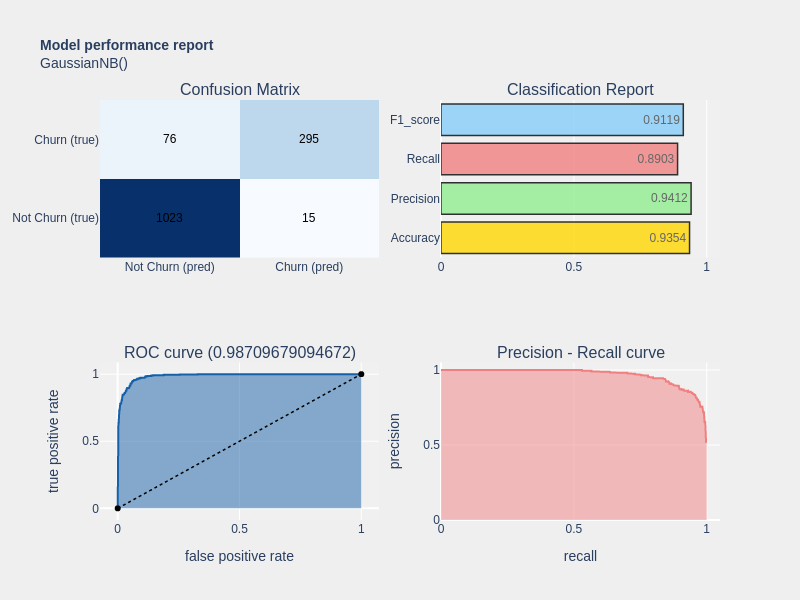

In [ ]:
# Baseline Gaussian Naive Bayes
gnb = GaussianNB(priors=None)

Telco_churn_prediction(gnb, x_train, x_test, y_train, y_test, "None")

Model: SVC


Accuracy Score: 0.9233498935415189
AUPRC Score: 0.934820885881477
AUROC Score: 0.9736859189089531
G-Mean Score: 0.9028671695110916
F1 Score: 0.901720530109277


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9506    0.9451    0.9478      1038
       Fraud     0.8488    0.8625    0.8556       371

    accuracy                         0.9233      1409
   macro avg     0.8997    0.9038    0.9017      1409
weighted avg     0.9238    0.9233    0.9235      1409



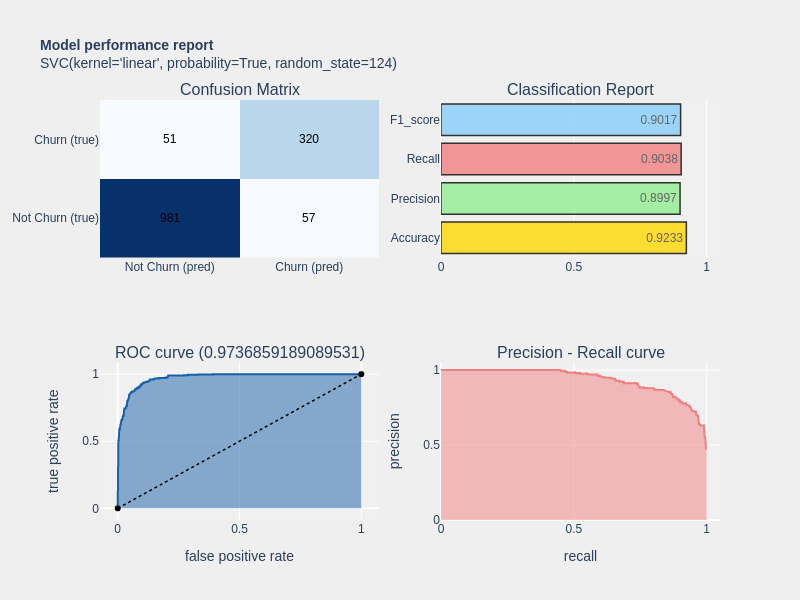

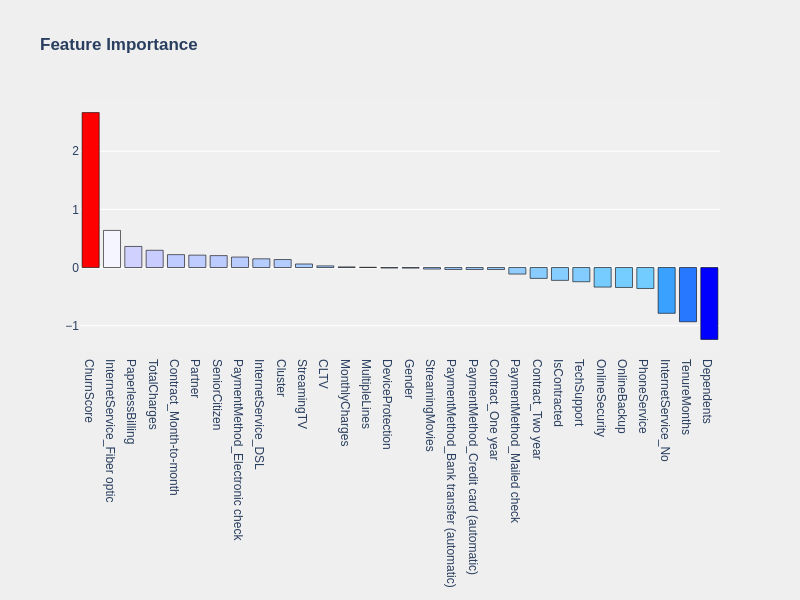

In [ ]:
# Baseline Support vector classifier using linear hyper plane
svc_lin  = SVC(C=1.0, kernel='linear', probability=True, random_state=124)

Telco_churn_prediction(svc_lin, x_train, x_test, y_train, y_test, "coefficients")

Model: SVC


Accuracy Score: 0.9609652235628106
AUPRC Score: 0.973998712845685
AUROC Score: 0.9906802943666287
G-Mean Score: 0.9471009682677509
F1 Score: 0.9494717665875332


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9712    0.9759    0.9736      1038
       Fraud     0.9317    0.9191    0.9254       371

    accuracy                         0.9610      1409
   macro avg     0.9515    0.9475    0.9495      1409
weighted avg     0.9608    0.9610    0.9609      1409



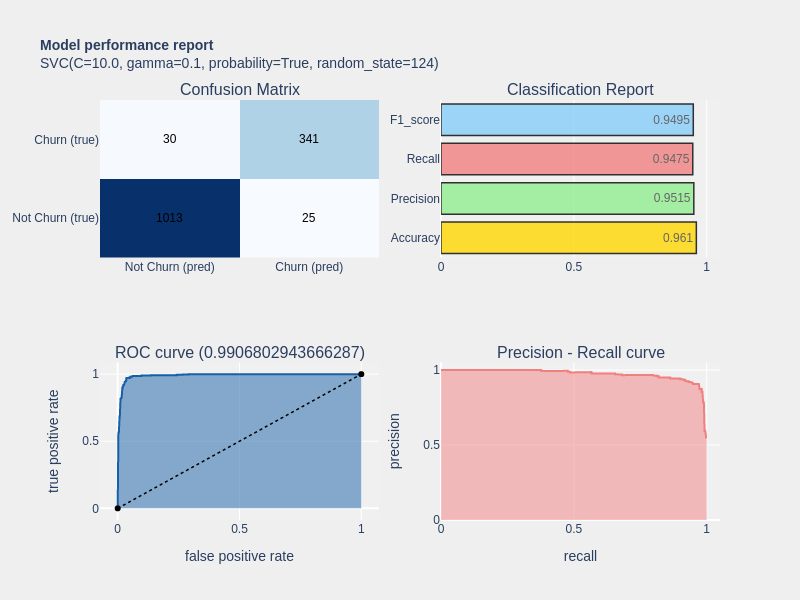

In [ ]:
# Baseline Support vector classifier using non-linear hyper plane ("rbf")
svc_rbf  = SVC(C=10.0, kernel='rbf', gamma=0.1, probability=True, random_state=124)   

Telco_churn_prediction(svc_rbf, x_train, x_test, y_train, y_test, "None")

Model: AdaBoostClassifier


Accuracy Score: 0.9723207948899929
AUPRC Score: 0.9907496767944085
AUROC Score: 0.996621639167173
G-Mean Score: 0.9664132004096992
F1 Score: 0.9644798411414854


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9835    0.9788    0.9812      1038
       Fraud     0.9415    0.9542    0.9478       371

    accuracy                         0.9723      1409
   macro avg     0.9625    0.9665    0.9645      1409
weighted avg     0.9725    0.9723    0.9724      1409



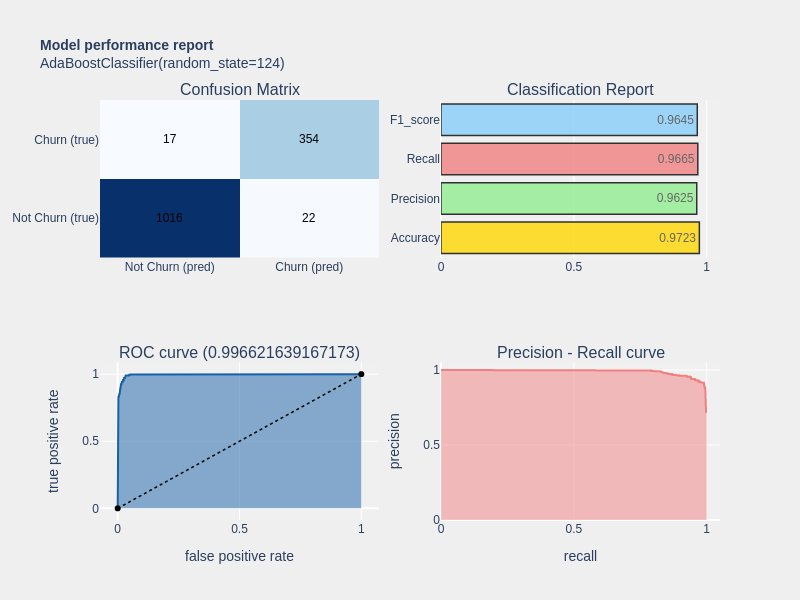

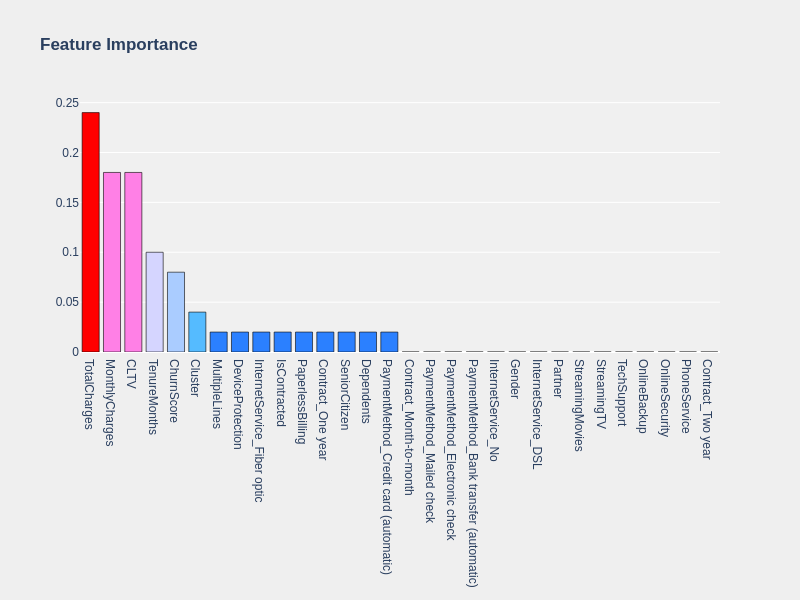

In [ ]:
# Baseline AdaBoost
adac = AdaBoostClassifier(random_state=124)

Telco_churn_prediction(adac, x_train, x_test, y_train, y_test, "features")

Model: GradientBoostingClassifier


Accuracy Score: 0.9744499645138396
AUPRC Score: 0.991760416462738
AUROC Score: 0.9970552950158142
G-Mean Score: 0.9722558618095133
F1 Score: 0.9674063907223491


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9883    0.9769    0.9826      1038
       Fraud     0.9373    0.9677    0.9523       371

    accuracy                         0.9744      1409
   macro avg     0.9628    0.9723    0.9674      1409
weighted avg     0.9749    0.9744    0.9746      1409



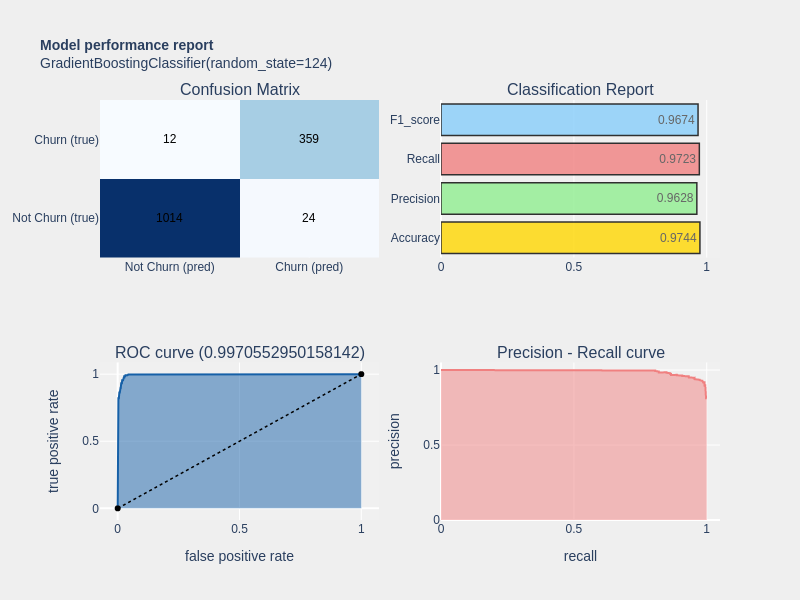

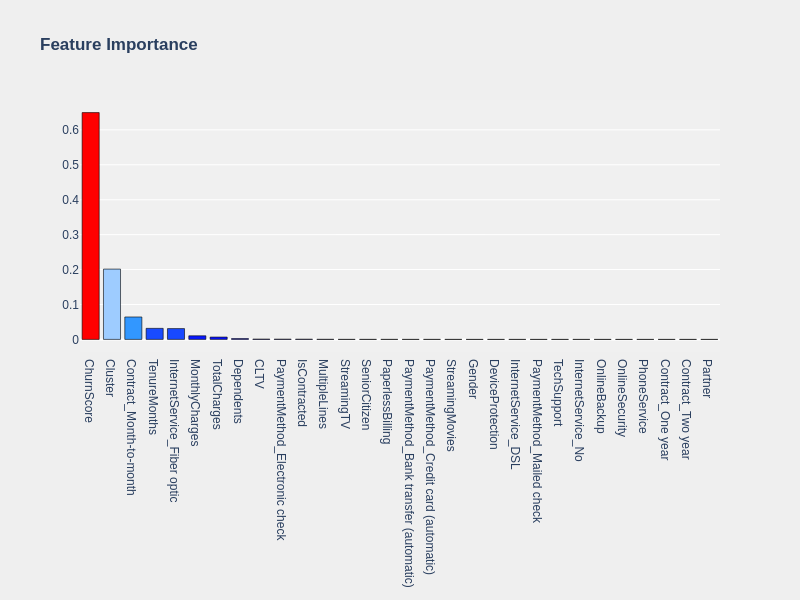

In [ ]:
# Baseline Gradient Boosting
gbc = GradientBoostingClassifier(random_state=124)

Telco_churn_prediction(gbc, x_train, x_test, y_train, y_test, "features")

# **BASELINE MODEL + SMOTE**

In [ ]:
# Upsampling using SMOTE
sm = SMOTE(random_state = random_state, sampling_strategy = 1.0)
x_train_sm , y_train_sm = sm.fit_resample(x_train,y_train)
x_smote = pd.DataFrame(data = x_train_sm, columns=cols)
y_smote = pd.DataFrame(data = y_train_sm, columns=target_col)

df_smote = x_smote.copy()
df_smote['Churn'] = y_train_sm

print("----------------------------")
print("Original x train shape, ", x_train.shape)
print("Resample x train shape, ", x_train_sm.shape)
print("----------------------------")

----------------------------
Original x train shape,  (5634, 30)
Resample x train shape,  (8272, 30)
----------------------------


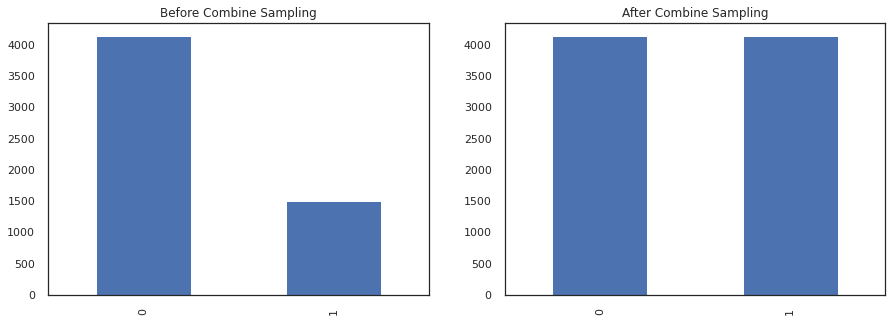

In [ ]:
# After sampling distribution in train dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_title('Before Combine Sampling')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After Combine Sampling')
pd.Series(y_train_sm).value_counts().plot.bar(ax=ax2)
plt.show()

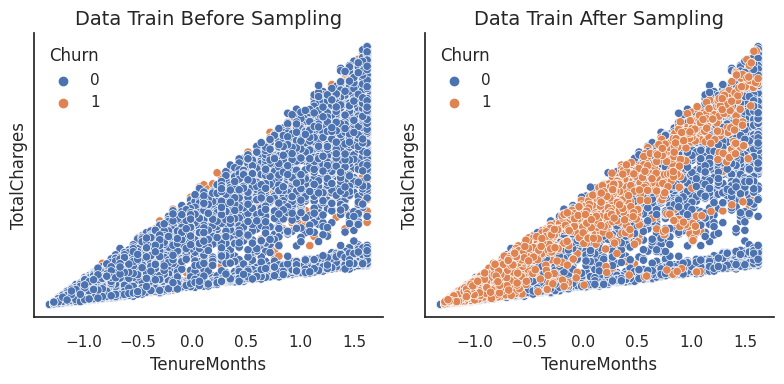

In [ ]:
df_feature = pd.DataFrame(df_model_feature, columns=df_model_feature.columns)
df_before_sampling = pd.concat([df_feature, df_telco_churn['Churn']], axis=1)

# After sampling distribution in train dataset
f, (axes) = plt.subplots(1,2,figsize=(8, 4), dpi=100)
sns.despine()
sns.scatterplot(x='TenureMonths', y='TotalCharges', hue = 'Churn', data=df_before_sampling, ax=axes[0])
axes[0].set_title('Data Train Before Sampling', fontsize=14)
sns.scatterplot(x='TenureMonths', y='TotalCharges', hue = 'Churn', data=df_smote, ax=axes[1])
axes[1].set_title('Data Train After Sampling', fontsize=14)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Model: LogisticRegression


Accuracy Score: 0.9098651525904897
AUPRC Score: 0.9338978298414189
AUROC Score: 0.9731652722164229
G-Mean Score: 0.9049929852555443
F1 Score: 0.8883947866881798


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9606    0.9152    0.9373      1038
       Fraud     0.7905    0.8949    0.8394       371

    accuracy                         0.9099      1409
   macro avg     0.8755    0.9051    0.8884      1409
weighted avg     0.9158    0.9099    0.9116      1409



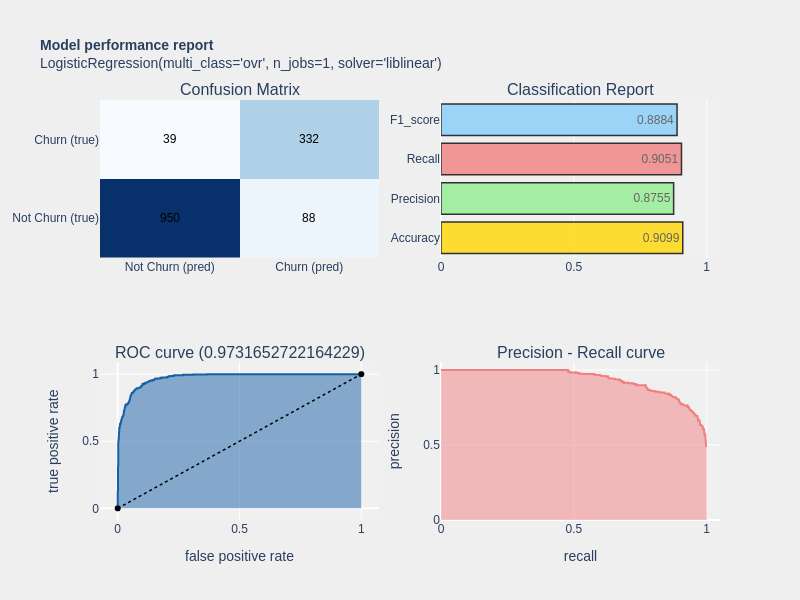

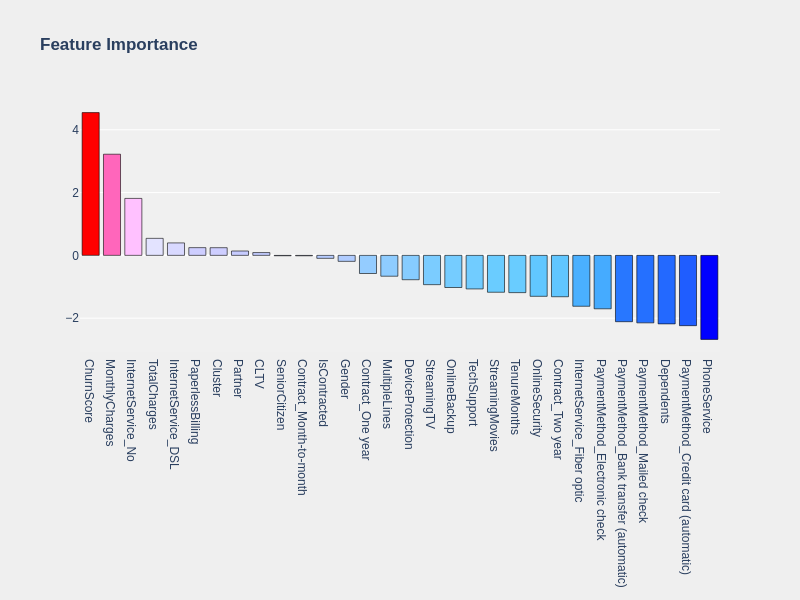

In [ ]:
# Logistic Regression + SMOTE
logit_sm = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                              intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                              penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                              verbose=0, warm_start=False)

Telco_churn_prediction(logit_sm, x_train_sm, x_test, y_train_sm, y_test, "coefficients")

Model: DecisionTreeClassifier


Accuracy Score: 0.9652235628105039
AUPRC Score: 0.9710844005387633
AUROC Score: 0.9863606147006736
G-Mean Score: 0.9668645091772772
F1 Score: 0.9561833899120444


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9891    0.9634    0.9761      1038
       Fraud     0.9045    0.9704    0.9363       371

    accuracy                         0.9652      1409
   macro avg     0.9468    0.9669    0.9562      1409
weighted avg     0.9668    0.9652    0.9656      1409



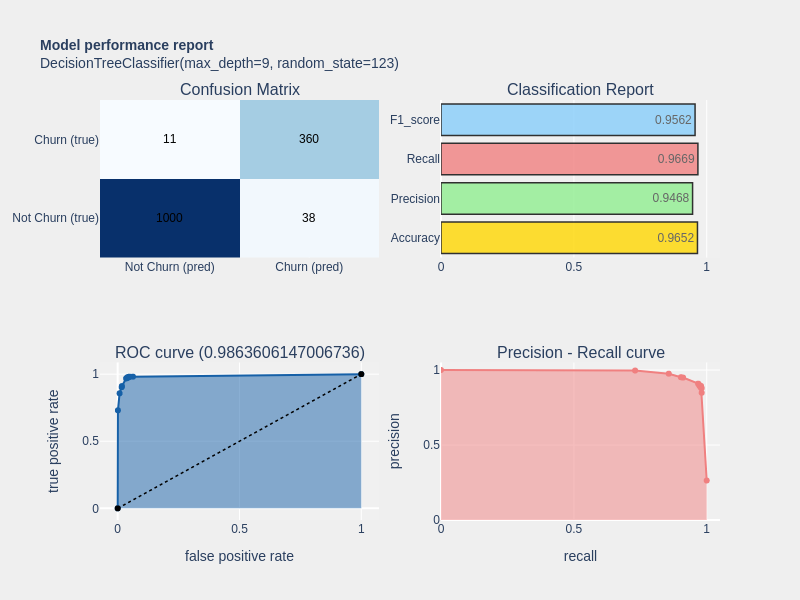

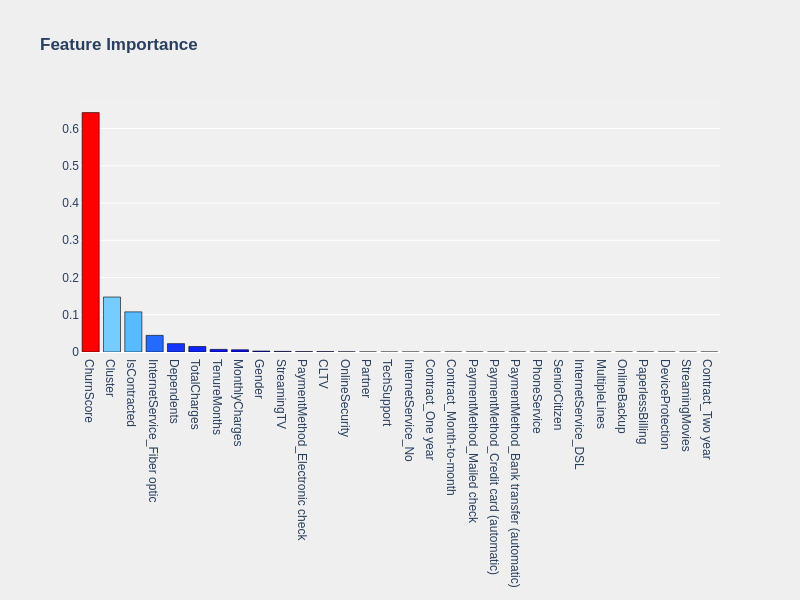

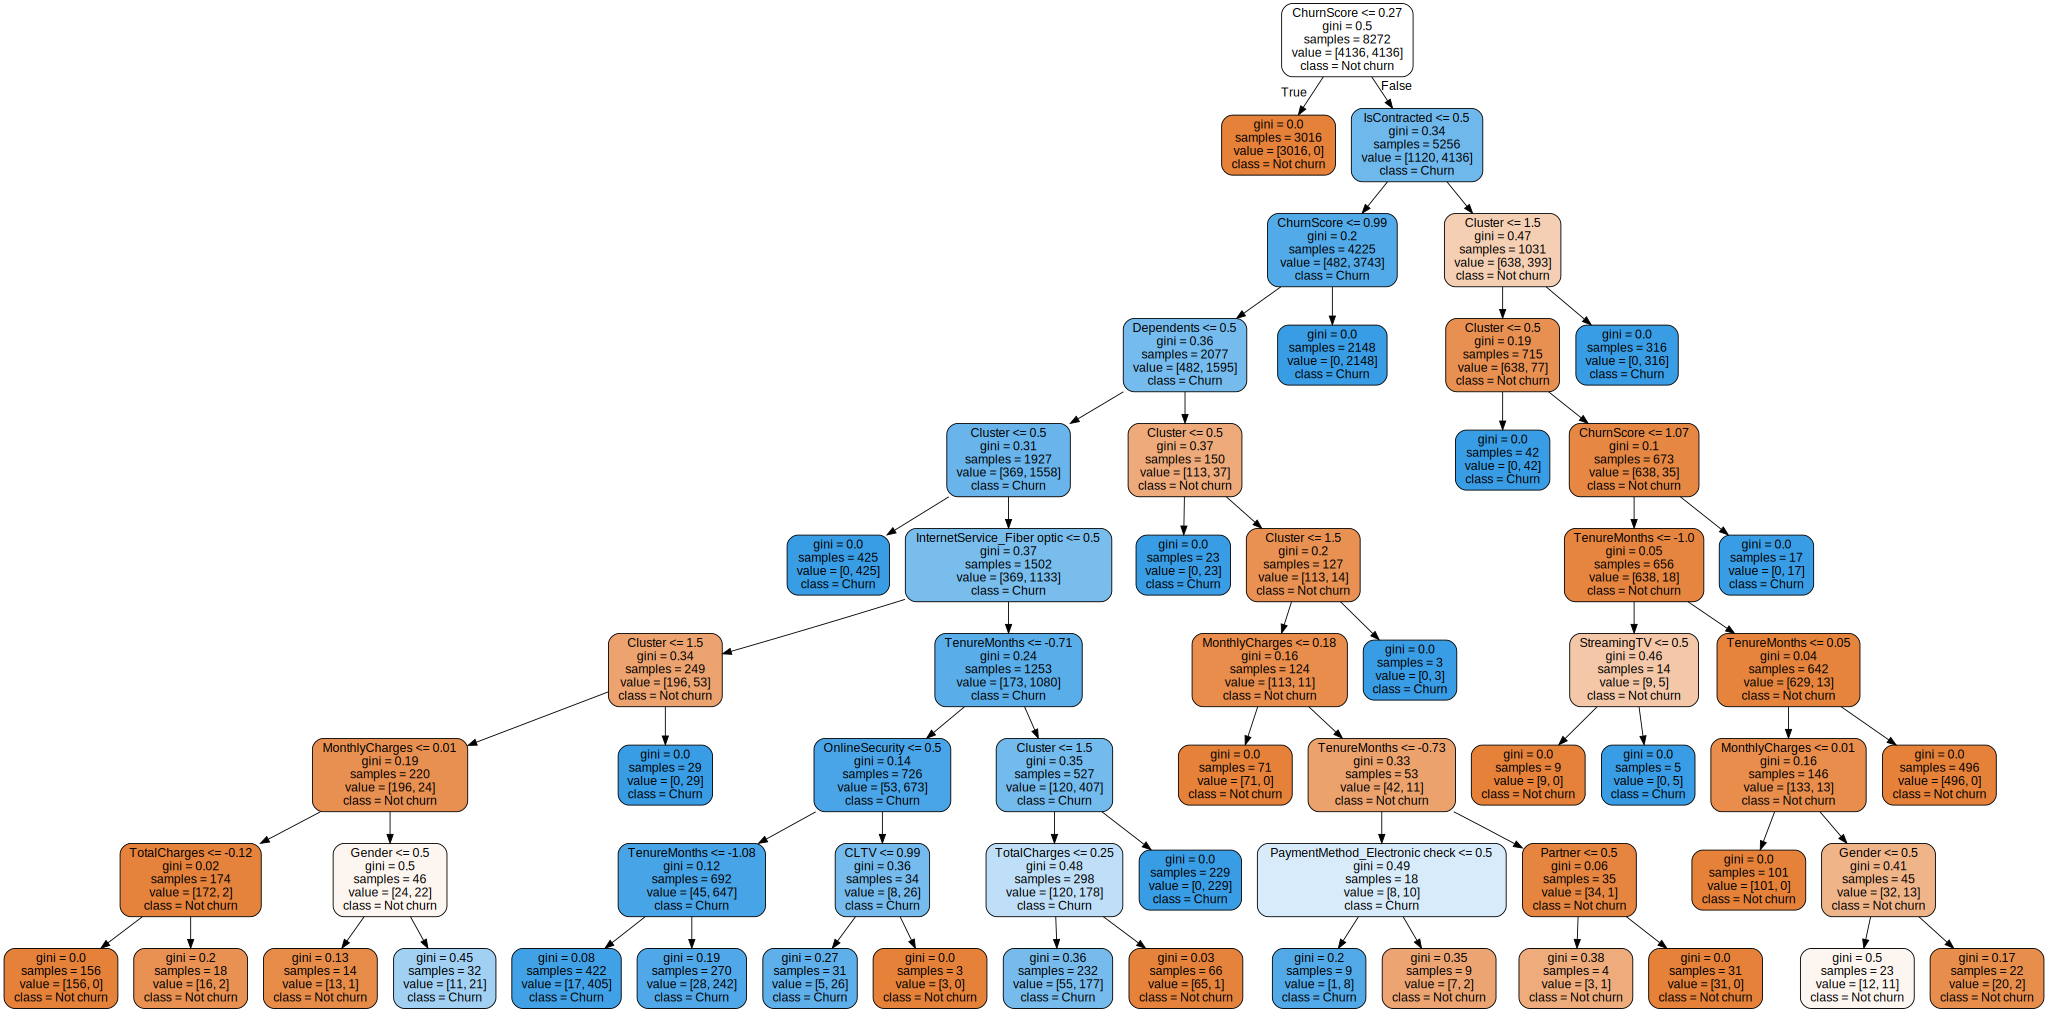

In [ ]:
# Decision Tree + SMOTE
decision_tree_sm = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                          splitter = "best", criterion = "gini")

Telco_churn_prediction(decision_tree_sm, x_train_sm, x_test, y_train_sm, y_test, "features")
print("\n\n")

Treeplot(decision_tree_sm, cols, ["Not churn", "Churn"])

Model: KNeighborsClassifier


Accuracy Score: 0.9169623846699787
AUPRC Score: 0.8643041867880419
AUROC Score: 0.9638559535494862
G-Mean Score: 0.9261103512302643
F1 Score: 0.8993067962552705


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9792    0.9066    0.9415      1038
       Fraud     0.7835    0.9461    0.8571       371

    accuracy                         0.9170      1409
   macro avg     0.8813    0.9263    0.8993      1409
weighted avg     0.9277    0.9170    0.9193      1409



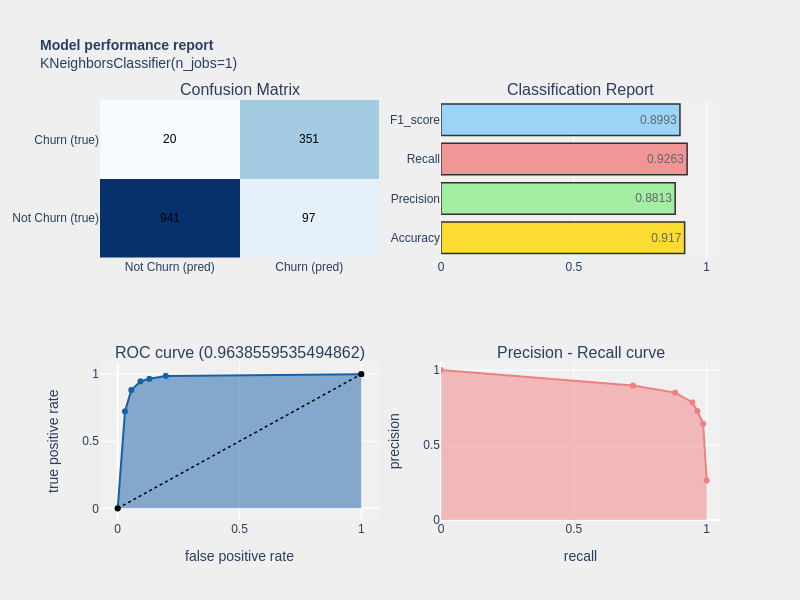

In [ ]:
# K Nearest Neighbor + SMOTE
knn_sm = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                              metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                              weights='uniform')

Telco_churn_prediction(knn_sm, x_train_sm, x_test, y_train_sm, y_test, "None")

Model: RandomForestClassifier


Accuracy Score: 0.9652235628105039
AUPRC Score: 0.9749279987607262
AUROC Score: 0.991976068429335
G-Mean Score: 0.9694273321506404
F1 Score: 0.9563949283943599


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9920    0.9605    0.9760      1038
       Fraud     0.8985    0.9784    0.9368       371

    accuracy                         0.9652      1409
   macro avg     0.9453    0.9695    0.9564      1409
weighted avg     0.9674    0.9652    0.9657      1409



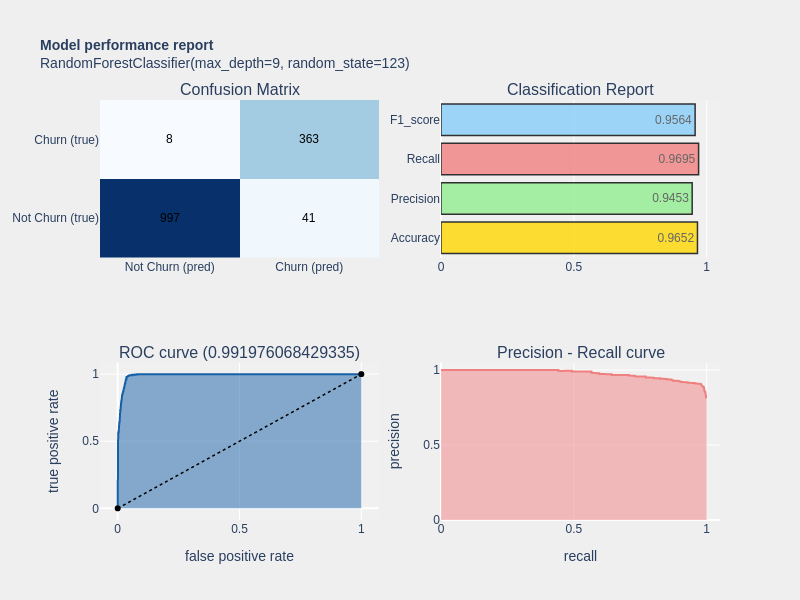

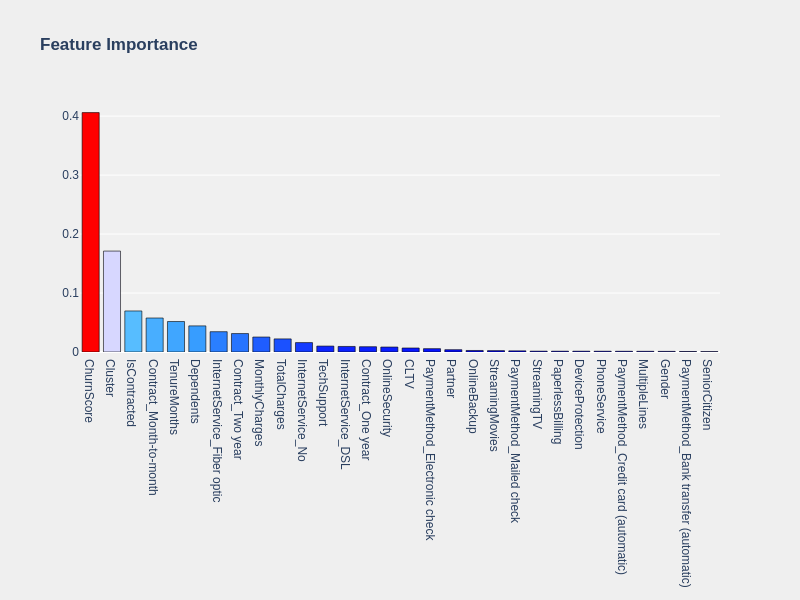

In [ ]:
# Random Forest + SMOTE
rfc_sm = RandomForestClassifier(n_estimators = 100, random_state = 123,
                                max_depth = 9, criterion = "gini")

Telco_churn_prediction(rfc_sm, x_train_sm, x_test, y_train_sm, y_test, "features")

Model: GaussianNB


Accuracy Score: 0.9382540809084458
AUPRC Score: 0.9607928409578246
AUROC Score: 0.9828744890910884
G-Mean Score: 0.9115073531641236
F1 Score: 0.9192164357381749


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9507    0.9663    0.9584      1038
       Fraud     0.9011    0.8598    0.8800       371

    accuracy                         0.9383      1409
   macro avg     0.9259    0.9131    0.9192      1409
weighted avg     0.9377    0.9383    0.9378      1409



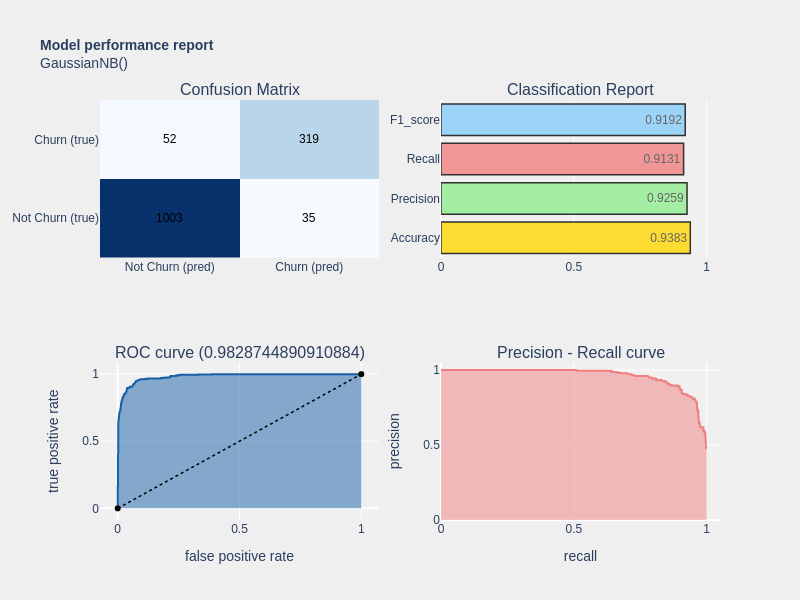

In [ ]:
# Gaussian Naive Bayes + SMOTE
gnb_sm = GaussianNB(priors=None)

Telco_churn_prediction(gnb_sm, x_train_sm, x_test, y_train_sm, y_test, "None")

Model: SVC


Accuracy Score: 0.9119943222143364
AUPRC Score: 0.9323913288957344
AUROC Score: 0.9725238770390914
G-Mean Score: 0.9064207952181684
F1 Score: 0.8907779250331325


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9607    0.9181    0.9389      1038
       Fraud     0.7962    0.8949    0.8426       371

    accuracy                         0.9120      1409
   macro avg     0.8784    0.9065    0.8908      1409
weighted avg     0.9174    0.9120    0.9136      1409



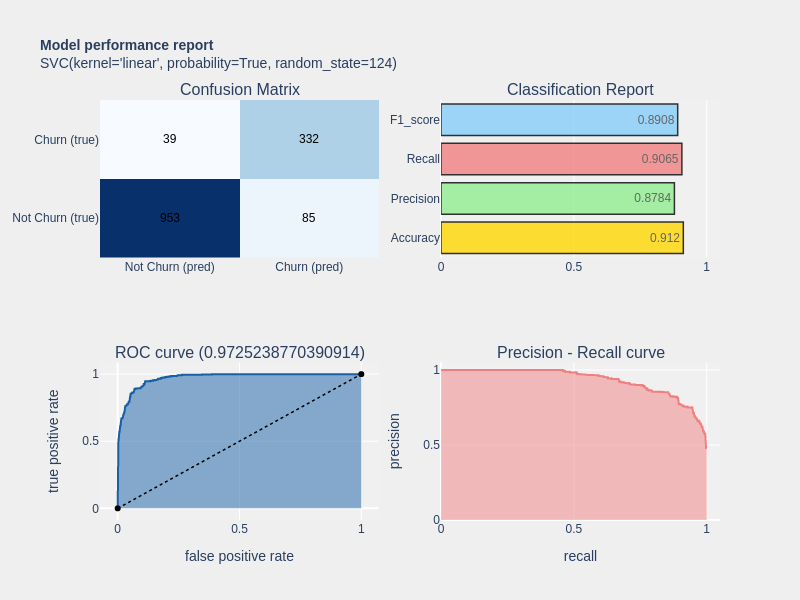

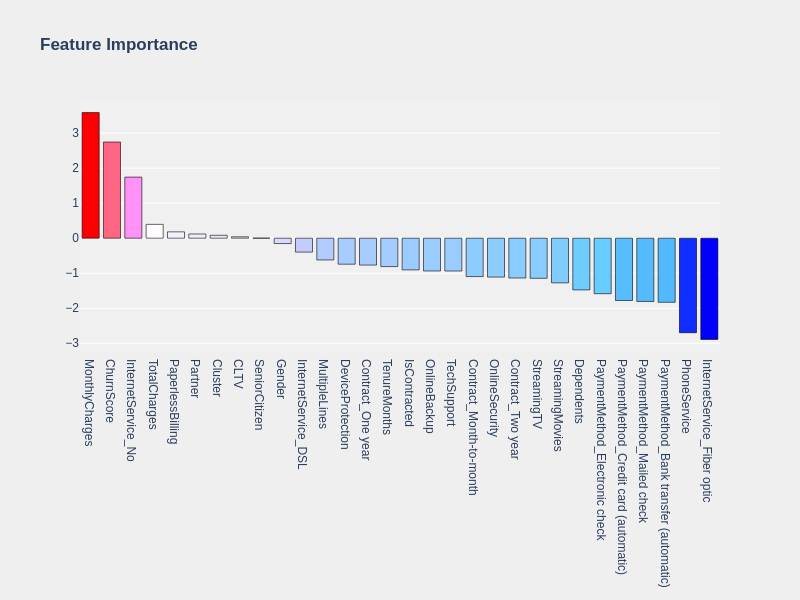

In [ ]:
# Support vector classifier using linear hyper plane + SMOTE
svc_lin_sm  = SVC(C=1.0, kernel='linear', probability=True, random_state=124)

Telco_churn_prediction(svc_lin_sm, x_train_sm, x_test, y_train_sm, y_test, "coefficients")

Model: SVC


Accuracy Score: 0.9623846699787083
AUPRC Score: 0.9714570655104173
AUROC Score: 0.990503715937242
G-Mean Score: 0.9544084075706205
F1 Score: 0.9518113727922068


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9777    0.9711    0.9744      1038
       Fraud     0.9206    0.9380    0.9292       371

    accuracy                         0.9624      1409
   macro avg     0.9492    0.9546    0.9518      1409
weighted avg     0.9627    0.9624    0.9625      1409



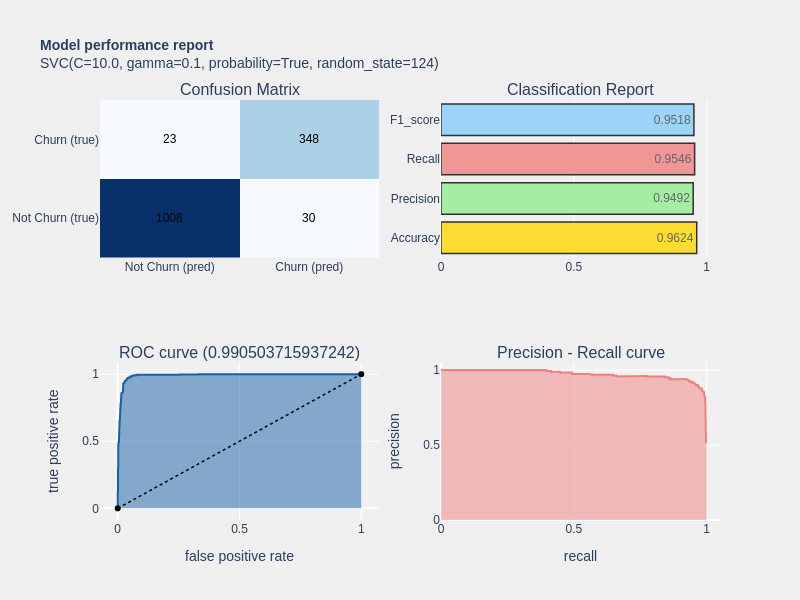

In [ ]:
# Support vector classifier using non-linear hyper plane ("rbf") + SMOTE
svc_rbf_sm  = SVC(C=10.0, kernel='rbf', gamma=0.1, probability=True, random_state=124)   

Telco_churn_prediction(svc_rbf_sm, x_train_sm, x_test, y_train_sm, y_test, "None")

Model: AdaBoostClassifier


Accuracy Score: 0.9737402413058907
AUPRC Score: 0.9918313611505377
AUROC Score: 0.9970604884990314
G-Mean Score: 0.9752439483369779
F1 Score: 0.9667511711039468


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9921    0.9721    0.9820      1038
       Fraud     0.9260    0.9784    0.9515       371

    accuracy                         0.9737      1409
   macro avg     0.9591    0.9752    0.9668      1409
weighted avg     0.9747    0.9737    0.9740      1409



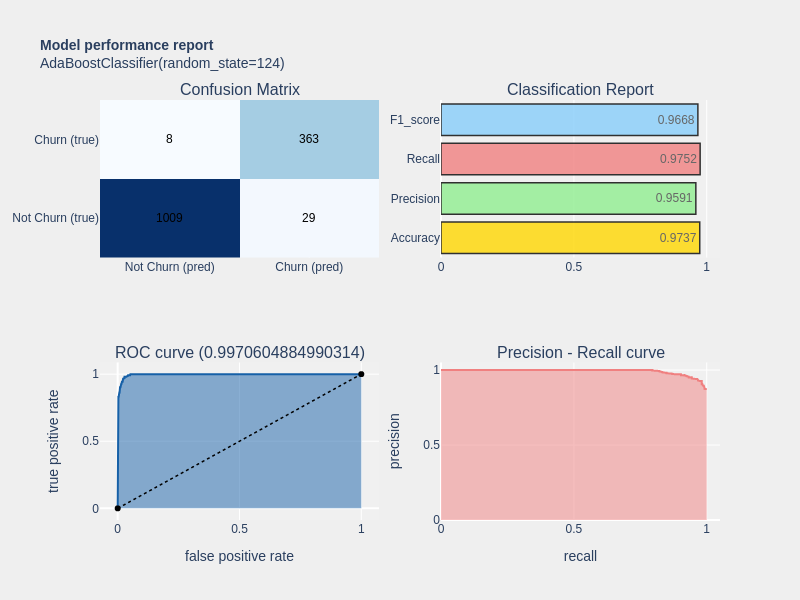

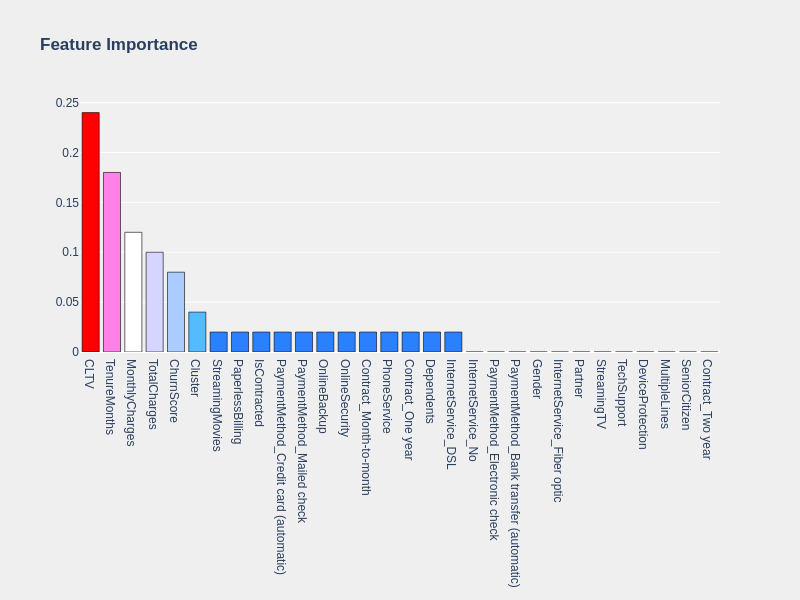

In [ ]:
# AdaBoost + SMOTE
adac_sm = AdaBoostClassifier(random_state=124)

Telco_churn_prediction(adac_sm, x_train_sm, x_test, y_train_sm, y_test, "features")

Model: GradientBoostingClassifier


Accuracy Score: 0.9723207948899929
AUPRC Score: 0.9912526947455457
AUROC Score: 0.9968800149572316
G-Mean Score: 0.9751334417475291
F1 Score: 0.9650687138973135


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9931    0.9692    0.9810      1038
       Fraud     0.9192    0.9811    0.9492       371

    accuracy                         0.9723      1409
   macro avg     0.9561    0.9752    0.9651      1409
weighted avg     0.9736    0.9723    0.9726      1409



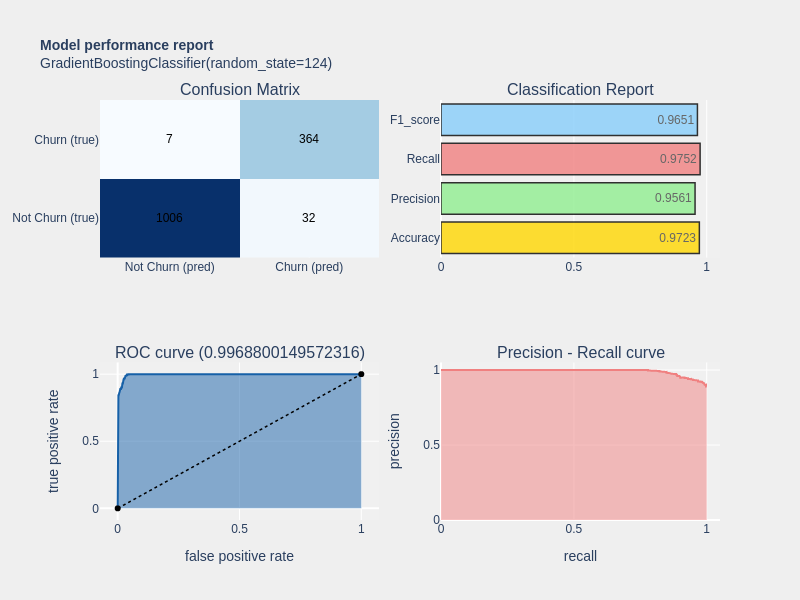

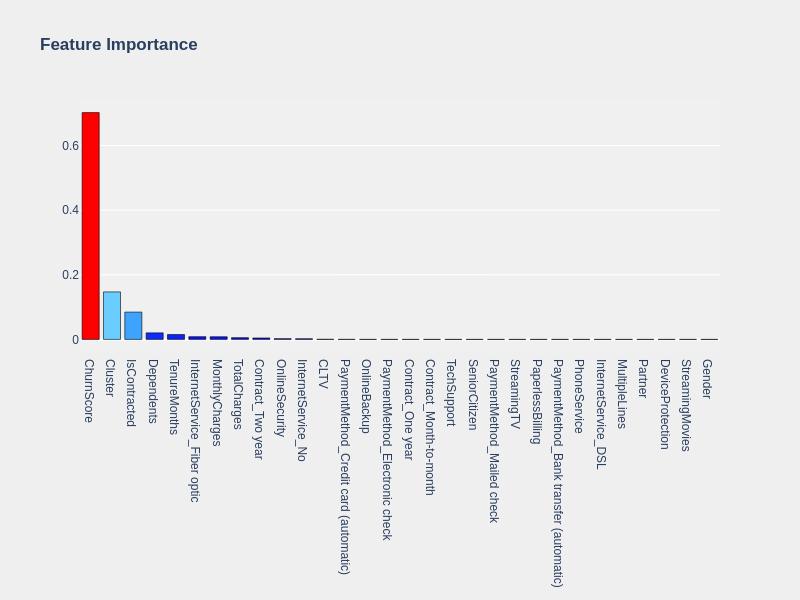

In [ ]:
# Gradient Boosting + SMOTE
gbc_sm = GradientBoostingClassifier(random_state=124)

Telco_churn_prediction(gbc_sm, x_train_sm, x_test, y_train_sm, y_test, "features")

In [ ]:
# Putting all the model names, model classes and the used columns in a dictionary
models = {'Logistic (Baseline)': [logit, cols],
          'Logistic (SMOTE)': [logit_sm, cols], 
          'Decision Tree (Baseline)': [decision_tree, cols], 
          'Decision Tree (SMOTE)': [decision_tree_sm, cols], 
          'KNN Classifier (Baseline)': [knn, cols], 
          'KNN Classifier (SMOTE)': [knn_sm, cols], 
          'Random Forest (Baseline)': [rfc, cols], 
          'Random Forest (SMOTE)': [rfc_sm, cols], 
          'Naive Bayes (Baseline)': [gnb, cols], 
          'Naive Bayes (SMOTE)': [gnb_sm, cols], 
          'SVM linear (Baseline)': [svc_lin, cols], 
          'SVM linear (SMOTE)': [svc_lin_sm, cols], 
          'SVM rbf (Baseline)': [svc_rbf, cols], 
          'SVM rbf (SMOTE)': [svc_rbf_sm, cols], 
          'AdaBoost (Baseline)': [adac, cols], 
          'AdaBoost (SMOTE)': [adac_sm, cols], 
          'GradientBoost (Baseline)': [gbc, cols], 
          'GradientBoost (SMOTE)': [gbc_sm, cols], 
         }

In [ ]:
# Gives model report in dataframe
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    probabilities = model.predict_proba(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, probabilities[:,1])
    f1score = f1_score(testing_y, predictions) 
    kappa_metric = cohen_kappa_score(testing_y, predictions)  
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [ ]:
# Outputs evaluation of all models, display in tabular form
model_performances = pd.DataFrame() 

key = 'SMOTE'
res = dict(filter(lambda item: key in item[0], models.items()))

for name in models:
    if name in res :
        model_performances = model_performances.append(model_report(models[name][0], 
                                                                    x_smote[models[name][1]], 
                                                                    x_test[models[name][1]], 
                                                                    y_smote, y_test, name), ignore_index=True)
    else:
        model_performances = model_performances.append(model_report(models[name][0], 
                                                                    x_train[models[name][1]], 
                                                                    x_test[models[name][1]], 
                                                                    y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances, 4))
py.iplot(table_train)

In [ ]:
# Function to make plot evaluation of each models
def output_tracer(df, metric, color):
    tracer = go.Bar(y = df["Model"],x = df[metric],
                    orientation = "h", name = metric,
                    marker = dict(line = dict(width =.7), color = color)
                   )
    return tracer

def modelmetricsplot(df, title):
    layout = go.Layout(dict(title = title,
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        margin = dict(l = 250),
                        width=1000,
                        height = 780
                       )
                  )
    trace1 = output_tracer(df, "Accuracy", "#6699FF")
    trace2 = output_tracer(df, 'Recall', "red")
    trace3 = output_tracer(df, 'Precision', "#33CC99")
    trace4 = output_tracer(df, 'f1-score', "lightgrey")
    trace5 = output_tracer(df, 'Roc_auc', "magenta")
    trace6 = output_tracer(df, 'Kappa_metric', "#FFCC99")

    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    fig = go.Figure(data=data, layout=layout)
    fig.show('png')

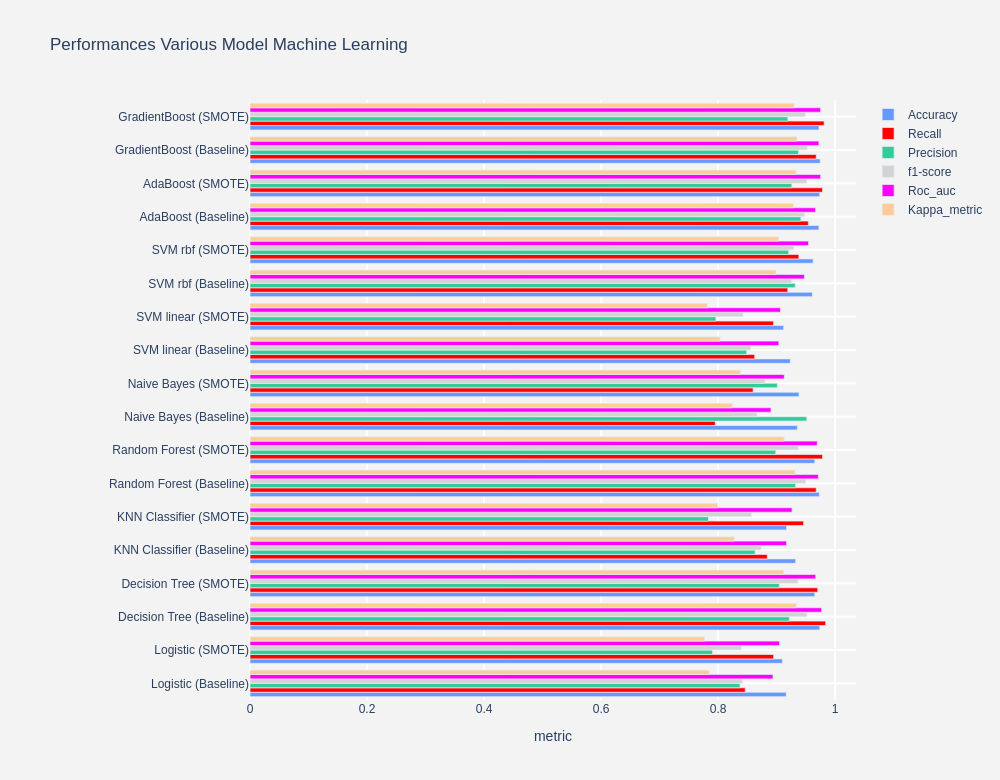

In [ ]:
modelmetricsplot(df=model_performances, title="Performances Various Model Machine Learning ")

In [ ]:
# Function to make evaluation confusion matrix
def confmatplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        key = 'SMOTE'
        res = dict(filter(lambda item: key in item[0], models.items()))
        if name in res:
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)

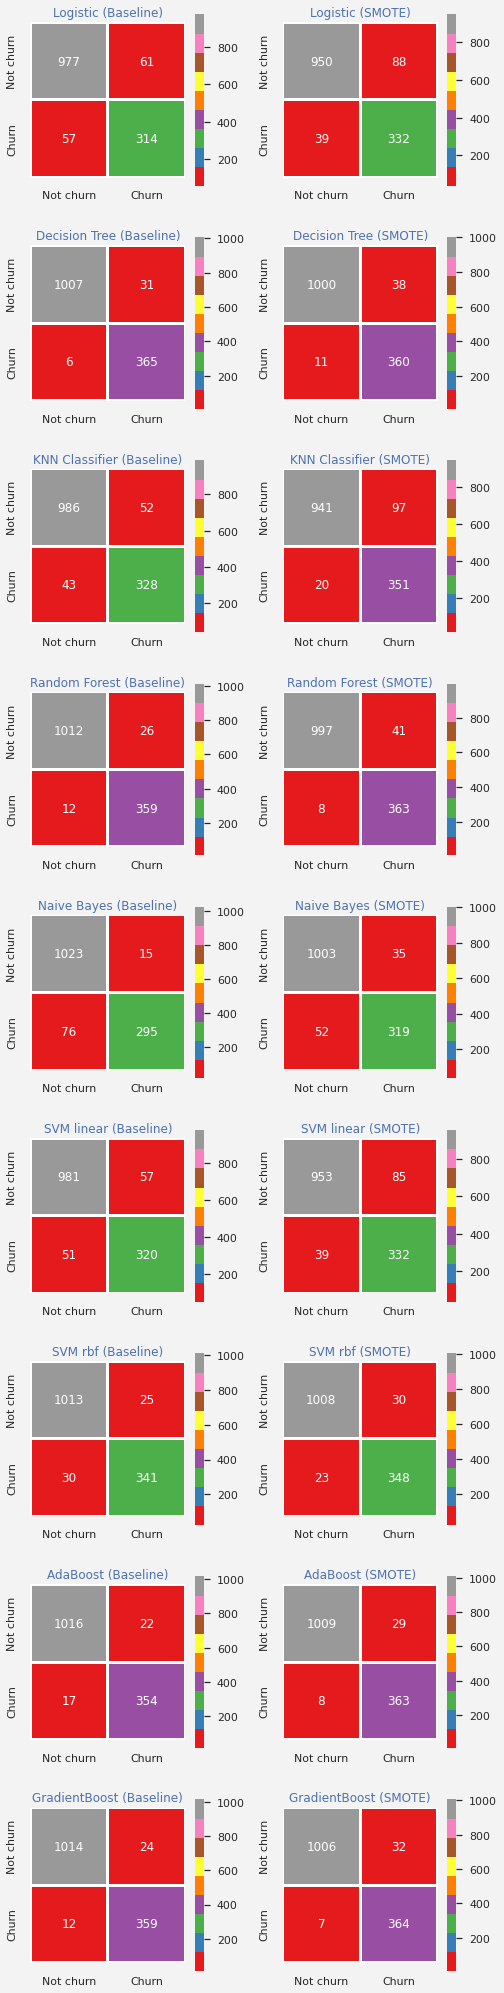

In [ ]:
confmatplot(modeldict=models, df_train=[x_train, x_train_sm], df_test=x_test, 
            target_train=[y_train, y_train_sm], target_test=y_test, figcolnumber=2)

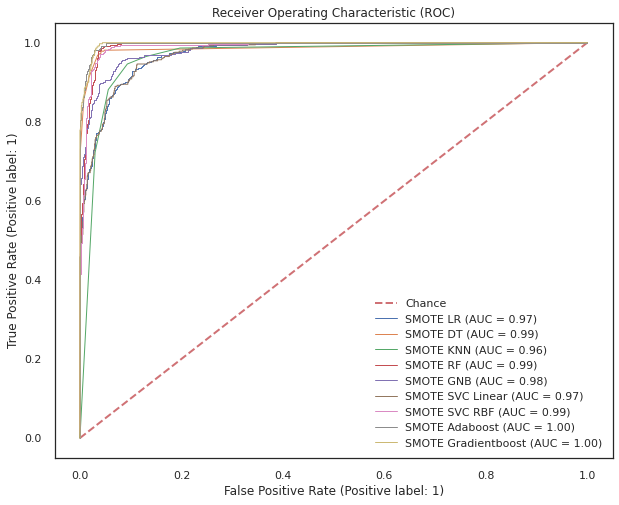

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver Operating Characteristic (ROC)")
ax.legend(loc="lower right")

# Plot all results on one graph

plot_roc_curve(logit_sm, x_test, y_test, name='SMOTE LR',lw=1, ax=ax)
plot_roc_curve(decision_tree_sm, x_test, y_test, name='SMOTE DT',lw=1, ax=ax)
plot_roc_curve(knn_sm, x_test, y_test, name='SMOTE KNN',lw=1, ax=ax)
plot_roc_curve(rfc_sm, x_test, y_test, name='SMOTE RF',lw=1, ax=ax)
plot_roc_curve(gnb_sm, x_test, y_test, name='SMOTE GNB',lw=1, ax=ax)
plot_roc_curve(svc_lin_sm, x_test, y_test, name='SMOTE SVC Linear',lw=1, ax=ax)
plot_roc_curve(svc_rbf_sm, x_test, y_test, name='SMOTE SVC RBF',lw=1, ax=ax)
plot_roc_curve(adac_sm, x_test, y_test, name='SMOTE Adaboost',lw=1, ax=ax)
plot_roc_curve(gbc_sm, x_test, y_test, name='SMOTE Gradientboost',lw=1, ax=ax)
plt.show()

# **CONCLUSION**

* Dari keseluruhan model Machine Learning Baseline menunjukkan nilai Accuracy dan ROC AUC score tertinggi ada pada model AdaBoost dengan Teknik SMOTE.
* Dari hasil Classification Report dan Confusion Matrix hasil akurasi maupun hasil prediksi yang lebih baik diperoleh pada model dengan teknik SMOTE dibanding model Baseline. Seperti contoh pada model AdaBoost Baseline perolehan akurasi yang diperoleh sebesar 97.23% dan Roc Auc sebesar 99.66% dengan data aktual **"Churn"** dan terprediksi tepat oleh sistem sebagai kelas **"Churn"** hanya sebanyak 354 sedangkan pada model AdaBoost dengan Teknik SMOTE dimana perolehan akurasi yang diperoleh sebesar 97.37% dan Roc Auc sebesar 99.71% dengan data aktual **"Churn"** dan terprediksi tepat oleh sistem sebagai kelas **"Churn"** sebanyak 363. Dari hal ini, menunjukkan bahwa dengan menerapkan Teknik SMOTE membantu mengetahui jumlah pasti pelanggan berisiko tinggi yang akan melakukan **"Churn"**.


<br>
<br>

#### **Why customers leaving the company**?
Alasan di balik pelanggan meninggalkan perusahaan bisa jadi
- Biaya tinggi
- Tawaran yang lebih baik dari pesaing
- Layanan pelanggan yang buruk
- Beberapa alasan yang tidak diketahui

#### **How to detect the churn customer**? 

- Pemantauan penggunaan
- Menganalisa keluhan
- Menganalisis penawaran pesaing

#### **How to prevent customers from leaving a company**?

Setelah Anda mendeteksi pelanggan berisiko tinggi, terapkan
- Rencana retensi
- Meningkatkan layanan pelanggan